# Heart Disease Prediction

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('heart_prediction.csv')

In [3]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [5]:
df.shape

(270, 5)

In [6]:
df.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


In [7]:
df['heart disease'].value_counts()

0    150
1    120
Name: heart disease, dtype: int64

In [8]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)

# Putting response variable to y
y = df['heart disease']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

In [11]:
y_train.shape

(189,)

In [12]:
y_test.shape

(81,)

### Fitting the decision tree with default hyperparameters, apart from max_depth which is 3 so that we can plot and read the tree.¶¶

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dt=DecisionTreeClassifier(max_depth=3)

In [15]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [16]:
from sklearn.tree import plot_tree

In [ ]:
'''plot_tree(model,feature_names=X.columns,filled=True)
'''

[Text(167.4, 190.26, 'age <= 54.5\ngini = 0.498\nsamples = 189\nvalue = [101, 88]'),
 Text(83.7, 135.9, 'sex <= 0.5\ngini = 0.416\nsamples = 88\nvalue = [62, 26]'),
 Text(41.85, 81.53999999999999, 'cholestrol <= 300.0\ngini = 0.091\nsamples = 21\nvalue = [20, 1]'),
 Text(20.925, 27.180000000000007, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(125.55000000000001, 81.53999999999999, 'age <= 40.5\ngini = 0.468\nsamples = 67\nvalue = [42, 25]'),
 Text(104.625, 27.180000000000007, 'gini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(146.475, 27.180000000000007, 'gini = 0.441\nsamples = 58\nvalue = [39, 19]'),
 Text(251.10000000000002, 135.9, 'sex <= 0.5\ngini = 0.474\nsamples = 101\nvalue = [39, 62]'),
 Text(209.25, 81.53999999999999, 'BP <= 167.0\ngini = 0.47\nsamples = 37\nvalue = [23, 14]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.422\nsamples = 33\nvalue = [23, 10]'),
 Text(23

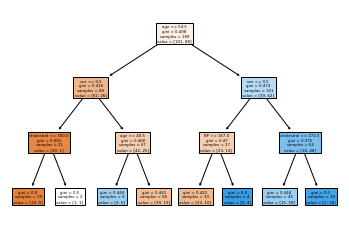

In [17]:
plot_tree(dt,feature_names=X.columns,filled=True)

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [19]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [20]:
evaluate_model(dt)

Train Accuracy : 0.7407407407407407
Train Confusion Matrix:
[[82 19]
 [30 58]]
--------------------------------------------------
Test Accuracy : 0.6049382716049383
Test Confusion Matrix:
[[35 14]
 [18 14]]


### Specifying minimum samples before split

In [21]:
dt_min_split = DecisionTreeClassifier(min_samples_split=20)
dt_min_split.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=20)

[Text(167.4, 206.56799999999998, 'age <= 54.5\ngini = 0.498\nsamples = 189\nvalue = [101, 88]'),
 Text(74.4, 184.824, 'sex <= 0.5\ngini = 0.416\nsamples = 88\nvalue = [62, 26]'),
 Text(37.2, 163.07999999999998, 'cholestrol <= 300.0\ngini = 0.091\nsamples = 21\nvalue = [20, 1]'),
 Text(18.6, 141.336, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(55.800000000000004, 141.336, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(111.60000000000001, 163.07999999999998, 'age <= 40.5\ngini = 0.468\nsamples = 67\nvalue = [42, 25]'),
 Text(93.0, 141.336, 'gini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(130.20000000000002, 141.336, 'cholestrol <= 273.5\ngini = 0.441\nsamples = 58\nvalue = [39, 19]'),
 Text(111.60000000000001, 119.592, 'cholestrol <= 181.5\ngini = 0.386\nsamples = 46\nvalue = [34, 12]'),
 Text(93.0, 97.848, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(130.20000000000002, 97.848, 'age <= 45.5\ngini = 0.369\nsamples = 45\nvalue = [34, 11]'),
 Text(111.60000000000001, 76.

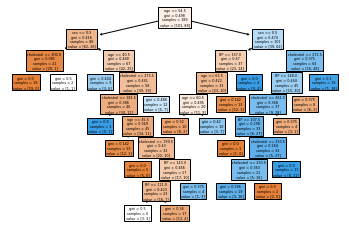

In [23]:
plot_tree(dt_min_split,feature_names=X.columns,filled=True)

In [25]:
evaluate_model(dt_min_split)

Train Accuracy : 0.8359788359788359
Train Confusion Matrix:
[[85 16]
 [15 73]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[32 17]
 [12 20]]


### Specifying minimum samples in leaf node

In [26]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
dt_min_leaf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

[Text(148.8, 195.696, 'age <= 54.5\ngini = 0.498\nsamples = 189\nvalue = [101, 88]'),
 Text(74.4, 152.208, 'sex <= 0.5\ngini = 0.416\nsamples = 88\nvalue = [62, 26]'),
 Text(37.2, 108.72, 'gini = 0.091\nsamples = 21\nvalue = [20, 1]'),
 Text(111.60000000000001, 108.72, 'cholestrol <= 253.0\ngini = 0.468\nsamples = 67\nvalue = [42, 25]'),
 Text(74.4, 65.232, 'BP <= 121.0\ngini = 0.435\nsamples = 47\nvalue = [32, 15]'),
 Text(37.2, 21.744, 'gini = 0.483\nsamples = 22\nvalue = [13, 9]'),
 Text(111.60000000000001, 21.744, 'gini = 0.365\nsamples = 25\nvalue = [19, 6]'),
 Text(148.8, 65.232, 'gini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(223.20000000000002, 152.208, 'sex <= 0.5\ngini = 0.474\nsamples = 101\nvalue = [39, 62]'),
 Text(186.0, 108.72, 'gini = 0.47\nsamples = 37\nvalue = [23, 14]'),
 Text(260.40000000000003, 108.72, 'cholestrol <= 245.5\ngini = 0.375\nsamples = 64\nvalue = [16, 48]'),
 Text(223.20000000000002, 65.232, 'gini = 0.471\nsamples = 29\nvalue = [11, 18]'),
 Text(2

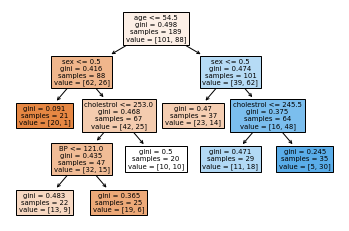

In [27]:
plot_tree(dt_min_leaf,feature_names=X.columns,filled=True)

In [28]:
evaluate_model(dt_min_leaf)

Train Accuracy : 0.7037037037037037
Train Confusion Matrix:
[[85 16]
 [40 48]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[38 11]
 [18 14]]


## Using Entropy instead of Gini

In [29]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion="entropy")
dt_min_leaf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

[Text(148.8, 195.696, 'age <= 54.5\nentropy = 0.997\nsamples = 189\nvalue = [101, 88]'),
 Text(74.4, 152.208, 'sex <= 0.5\nentropy = 0.876\nsamples = 88\nvalue = [62, 26]'),
 Text(37.2, 108.72, 'entropy = 0.276\nsamples = 21\nvalue = [20, 1]'),
 Text(111.60000000000001, 108.72, 'cholestrol <= 253.0\nentropy = 0.953\nsamples = 67\nvalue = [42, 25]'),
 Text(74.4, 65.232, 'BP <= 121.0\nentropy = 0.903\nsamples = 47\nvalue = [32, 15]'),
 Text(37.2, 21.744, 'entropy = 0.976\nsamples = 22\nvalue = [13, 9]'),
 Text(111.60000000000001, 21.744, 'entropy = 0.795\nsamples = 25\nvalue = [19, 6]'),
 Text(148.8, 65.232, 'entropy = 1.0\nsamples = 20\nvalue = [10, 10]'),
 Text(223.20000000000002, 152.208, 'sex <= 0.5\nentropy = 0.962\nsamples = 101\nvalue = [39, 62]'),
 Text(186.0, 108.72, 'entropy = 0.957\nsamples = 37\nvalue = [23, 14]'),
 Text(260.40000000000003, 108.72, 'cholestrol <= 245.5\nentropy = 0.811\nsamples = 64\nvalue = [16, 48]'),
 Text(223.20000000000002, 65.232, 'entropy = 0.958\nsamp

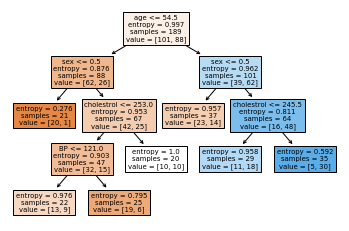

In [31]:
plot_tree(dt_min_leaf_entropy,feature_names=X.columns,filled=True)

In [32]:
evaluate_model(dt_min_leaf_entropy)

Train Accuracy : 0.7037037037037037
Train Confusion Matrix:
[[85 16]
 [40 48]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[38 11]
 [18 14]]


### Hyper-parameter tuning

In [33]:
dt = DecisionTreeClassifier(random_state=42)

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"],
    'min_samples_split':[5,10,15,20]}

In [36]:
# grid_search = GridSearchCV(estimator=dt, 
#                            param_grid=params, 
#                            cv=4, n_jobs=-1, verbose=1, scoring = "f1")

In [37]:
grid_search=GridSearchCV(dt,param_grid=params,cv=4,n_jobs=-1,verbose=1,
                         scoring = "accuracy")

In [38]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 200 candidates, totalling 800 fits
Wall time: 35.5 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [5, 10, 15, 20]},
             scoring='accuracy', verbose=1)

In [39]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 15}

In [40]:
dt_best=grid_search.best_estimator_

In [41]:
evaluate_model(dt_best)

Train Accuracy : 0.7195767195767195
Train Confusion Matrix:
[[82 19]
 [34 54]]
--------------------------------------------------
Test Accuracy : 0.6172839506172839
Test Confusion Matrix:
[[36 13]
 [18 14]]


[Text(167.4, 190.26, 'age <= 54.5\nentropy = 0.997\nsamples = 189\nvalue = [101, 88]'),
 Text(83.7, 135.9, 'sex <= 0.5\nentropy = 0.876\nsamples = 88\nvalue = [62, 26]'),
 Text(41.85, 81.53999999999999, 'cholestrol <= 266.0\nentropy = 0.276\nsamples = 21\nvalue = [20, 1]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(125.55000000000001, 81.53999999999999, 'age <= 40.5\nentropy = 0.953\nsamples = 67\nvalue = [42, 25]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.918\nsamples = 9\nvalue = [3, 6]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.912\nsamples = 58\nvalue = [39, 19]'),
 Text(251.10000000000002, 135.9, 'sex <= 0.5\nentropy = 0.962\nsamples = 101\nvalue = [39, 62]'),
 Text(209.25, 81.53999999999999, 'age <= 66.5\nentropy = 0.957\nsamples = 37\nvalue = [23, 14]'),
 Text(188.32500000000002, 27.180000000000007, 'entropy = 0.999\nsample

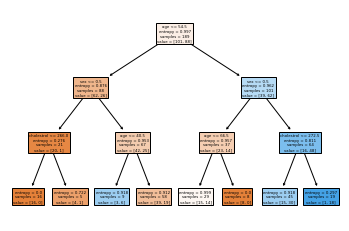

In [42]:
plot_tree(dt_best,feature_names=X.columns,filled=True)

# Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf=RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3)

In [45]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [46]:
rf.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1608637542),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1273642419),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1935803228),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=787846414),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=996406378),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1201263687),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=423734972),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=415968276),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=670094950),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1914837113)]

In [47]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1608637542)

In [48]:
sample_tree = rf.estimators_[4]

In [49]:
sample_tree

DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=996406378)

[Text(153.45000000000002, 190.26, 'sex <= 0.5\ngini = 0.499\nsamples = 117\nvalue = [98, 91]'),
 Text(83.7, 135.9, 'BP <= 169.0\ngini = 0.425\nsamples = 38\nvalue = [43, 19]'),
 Text(55.800000000000004, 81.53999999999999, 'age <= 63.5\ngini = 0.371\nsamples = 36\nvalue = [43, 14]'),
 Text(27.900000000000002, 27.180000000000007, 'gini = 0.467\nsamples = 24\nvalue = [22, 13]'),
 Text(83.7, 27.180000000000007, 'gini = 0.087\nsamples = 12\nvalue = [21, 1]'),
 Text(111.60000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 2\nvalue = [0, 5]'),
 Text(223.20000000000002, 135.9, 'age <= 52.5\ngini = 0.491\nsamples = 79\nvalue = [55, 72]'),
 Text(167.4, 81.53999999999999, 'BP <= 139.0\ngini = 0.436\nsamples = 32\nvalue = [36, 17]'),
 Text(139.5, 27.180000000000007, 'gini = 0.363\nsamples = 25\nvalue = [32, 10]'),
 Text(195.3, 27.180000000000007, 'gini = 0.463\nsamples = 7\nvalue = [4, 7]'),
 Text(279.0, 81.53999999999999, 'BP <= 131.0\ngini = 0.382\nsamples = 47\nvalue = [19, 55]'),
 Text(25

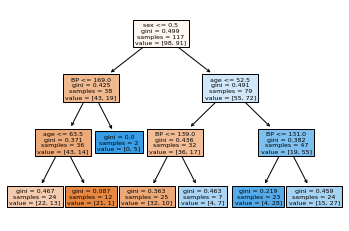

In [50]:
plot_tree(sample_tree,feature_names=X.columns,filled=True)

In [51]:
sample_tree = rf.estimators_[3]

[Text(141.64615384615385, 190.26, 'sex <= 0.5\ngini = 0.498\nsamples = 124\nvalue = [101, 88]'),
 Text(51.50769230769231, 135.9, 'age <= 50.5\ngini = 0.412\nsamples = 38\nvalue = [44, 18]'),
 Text(25.753846153846155, 81.53999999999999, 'gini = 0.0\nsamples = 11\nvalue = [17, 0]'),
 Text(77.26153846153846, 81.53999999999999, 'BP <= 167.0\ngini = 0.48\nsamples = 27\nvalue = [27, 18]'),
 Text(51.50769230769231, 27.180000000000007, 'gini = 0.426\nsamples = 24\nvalue = [27, 12]'),
 Text(103.01538461538462, 27.180000000000007, 'gini = 0.0\nsamples = 3\nvalue = [0, 6]'),
 Text(231.7846153846154, 135.9, 'age <= 57.5\ngini = 0.495\nsamples = 86\nvalue = [57, 70]'),
 Text(180.27692307692308, 81.53999999999999, 'cholestrol <= 211.5\ngini = 0.461\nsamples = 53\nvalue = [48, 27]'),
 Text(154.52307692307693, 27.180000000000007, 'gini = 0.363\nsamples = 18\nvalue = [16, 5]'),
 Text(206.03076923076924, 27.180000000000007, 'gini = 0.483\nsamples = 35\nvalue = [32, 22]'),
 Text(283.2923076923077, 81.539

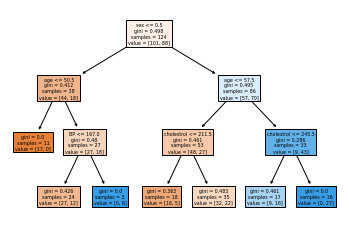

In [52]:
plot_tree(sample_tree,feature_names=X.columns,filled=True)

## OOB SCORE

In [53]:
rf=RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3,oob_score=True)


In [54]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, oob_score=True,
                       random_state=42)

In [55]:
rf.oob_score_

0.6349206349206349

# Grid search for hyper-parameter tuning

In [56]:
rf=RandomForestClassifier(random_state=42, n_jobs=-1)

In [57]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [58]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [59]:
grid_search.fit(X,y)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [61]:
rf_best = grid_search.best_estimator_

In [62]:
evaluate_model(rf_best)

Train Accuracy : 0.8042328042328042
Train Confusion Matrix:
[[87 14]
 [23 65]]
--------------------------------------------------
Test Accuracy : 0.8024691358024691
Test Confusion Matrix:
[[42  7]
 [ 9 23]]


# Boosting

## XGBoost Algorithm

####XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework optimized gradient boosting algorithm through parallel processing ,tree pruning,handling missing values and regularization to avoid overfittting or bias XGBoost uses ‘max_depth’ parameter as specified instead of criterion first, and starts pruning trees backward. This ‘depth-first’ approach improves computational performance significantly.

# Hyperparameters
### learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]
### max_depth: determines how deeply each tree is allowed to grow during any boosting round.
### subsample: percentage of samples used per tree. Low value can lead to underfitting.
### colsample_bytree: percentage of features used per tree. High value can lead to overfitting.
### n_estimators: number of trees you want to build.
### objective: determines the loss function to be used like reg:linear for regression problems, reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability.

### XGBoost also supports regularization parameters to penalize models as they become more complex and reduce them to simple (parsimonious) models.

### gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.
### alpha: L1 regularization on leaf weights. A large value leads to more regularization.
### lambda: L2 regularization on leaf weights and is smoother than L1 regularization.

In [63]:
from sklearn.datasets import load_boston
boston = load_boston()

In [64]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [65]:
print(boston.data.shape)

(506, 13)


In [66]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [67]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [68]:
import pandas as pd

data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

In [69]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [70]:
data['PRICE'] = boston.target

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [72]:
#!pip install xgboost

In [73]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [74]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]

### Now you will convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains

In [75]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [77]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [78]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)


[16:06:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [79]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 10.423243


In [80]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[16:11:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[16:11:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[16:11:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [81]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.750757,0.036152,21.765523,0.028850
1,19.778532,0.077649,19.830760,0.031760
2,18.052810,0.118633,18.157336,0.116038
3,16.458958,0.169189,16.623974,0.191414
4,15.074782,0.183546,15.254608,0.213612


In [82]:
print((cv_results["test-rmse-mean"]).tail(1))

49    3.99692
Name: test-rmse-mean, dtype: float64


### You can see that your RMSE for the price prediction has reduced as compared to last time and came out to be around 4.03 per 1000 


#### You can reach an even lower RMSE for a different set of hyper-parameters.

### Visualize Boosting Trees and Feature Importance

In [83]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[16:17:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[16:17:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


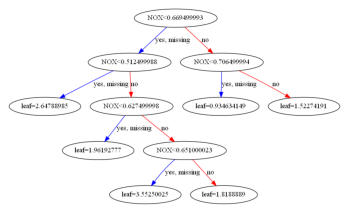

In [84]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [90, 20]
plt.show()

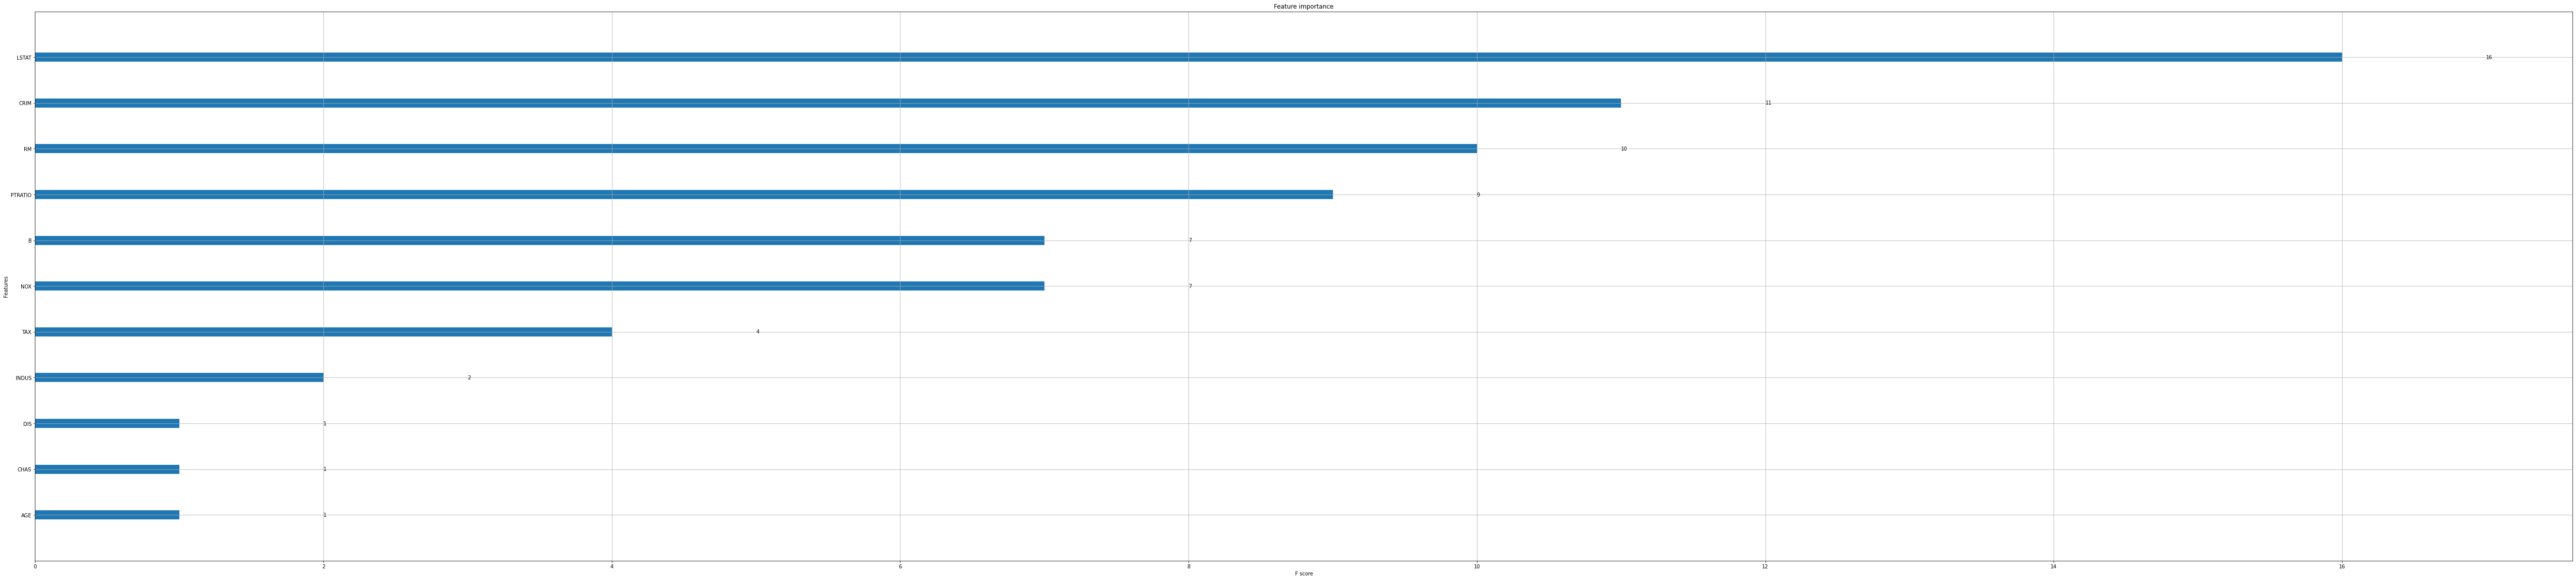

In [85]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

### AdaBoost

In [86]:
df = pd.read_csv("mushrooms.csv")

In [87]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [88]:
X = df.drop('class',axis=1)

In [89]:
X = pd.get_dummies(X,drop_first=True)

In [90]:
y = df['class']

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [93]:
from sklearn.ensemble import AdaBoostClassifier

In [94]:
model = AdaBoostClassifier(n_estimators=1)

In [95]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1)

In [96]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [97]:
predictions = model.predict(X_test)

In [98]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [99]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [100]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# Here are all 0s and only one 1 is there.this makes sense because our model is technically a single stump which means one feature is 100% important 
#to models capability to predict.

In [101]:
model.feature_importances_.argmax()

22

In [102]:
X.columns[22]

'odor_n'

In [103]:
#odor is the most important feature.This means according to our adaboost 
#classifier model with a single stump odor is the feature with which we can decide
#whether the mushroom is poisionous or edible

## Analyzing performance as more weak learners are added

In [104]:
len(X.columns)

95

In [105]:
error_rates = []

for n in range(1,96):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)
    
    error_rates.append(err)

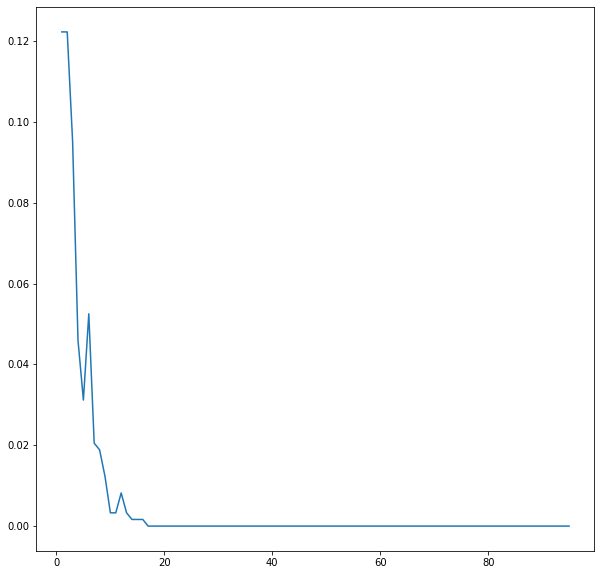

In [106]:
plt.plot(range(1,96),error_rates)

In [107]:
# error rate starts at 0.12 because initial accuracy was 88% and it goes on
#decreasing and after 20 it does not make any progress so adding 20 stumps is the 
#best choice for this

# Unsupervised learning

### Clustering

In [108]:
# k-means clustering

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
df = pd.read_csv("bank-full.csv")

In [111]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [112]:
# as it is Europian bank data absolute minimum age is to be 17 there.

In [113]:
# domain experience is the high part of unsupervised learning.so you do some
# research to have some domain knowledge or contact the doamin expert

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Continuous Feature Analysis

In [115]:
sns.set_style('whitegrid')
import seaborn as sns

<AxesSubplot:xlabel='age', ylabel='Count'>

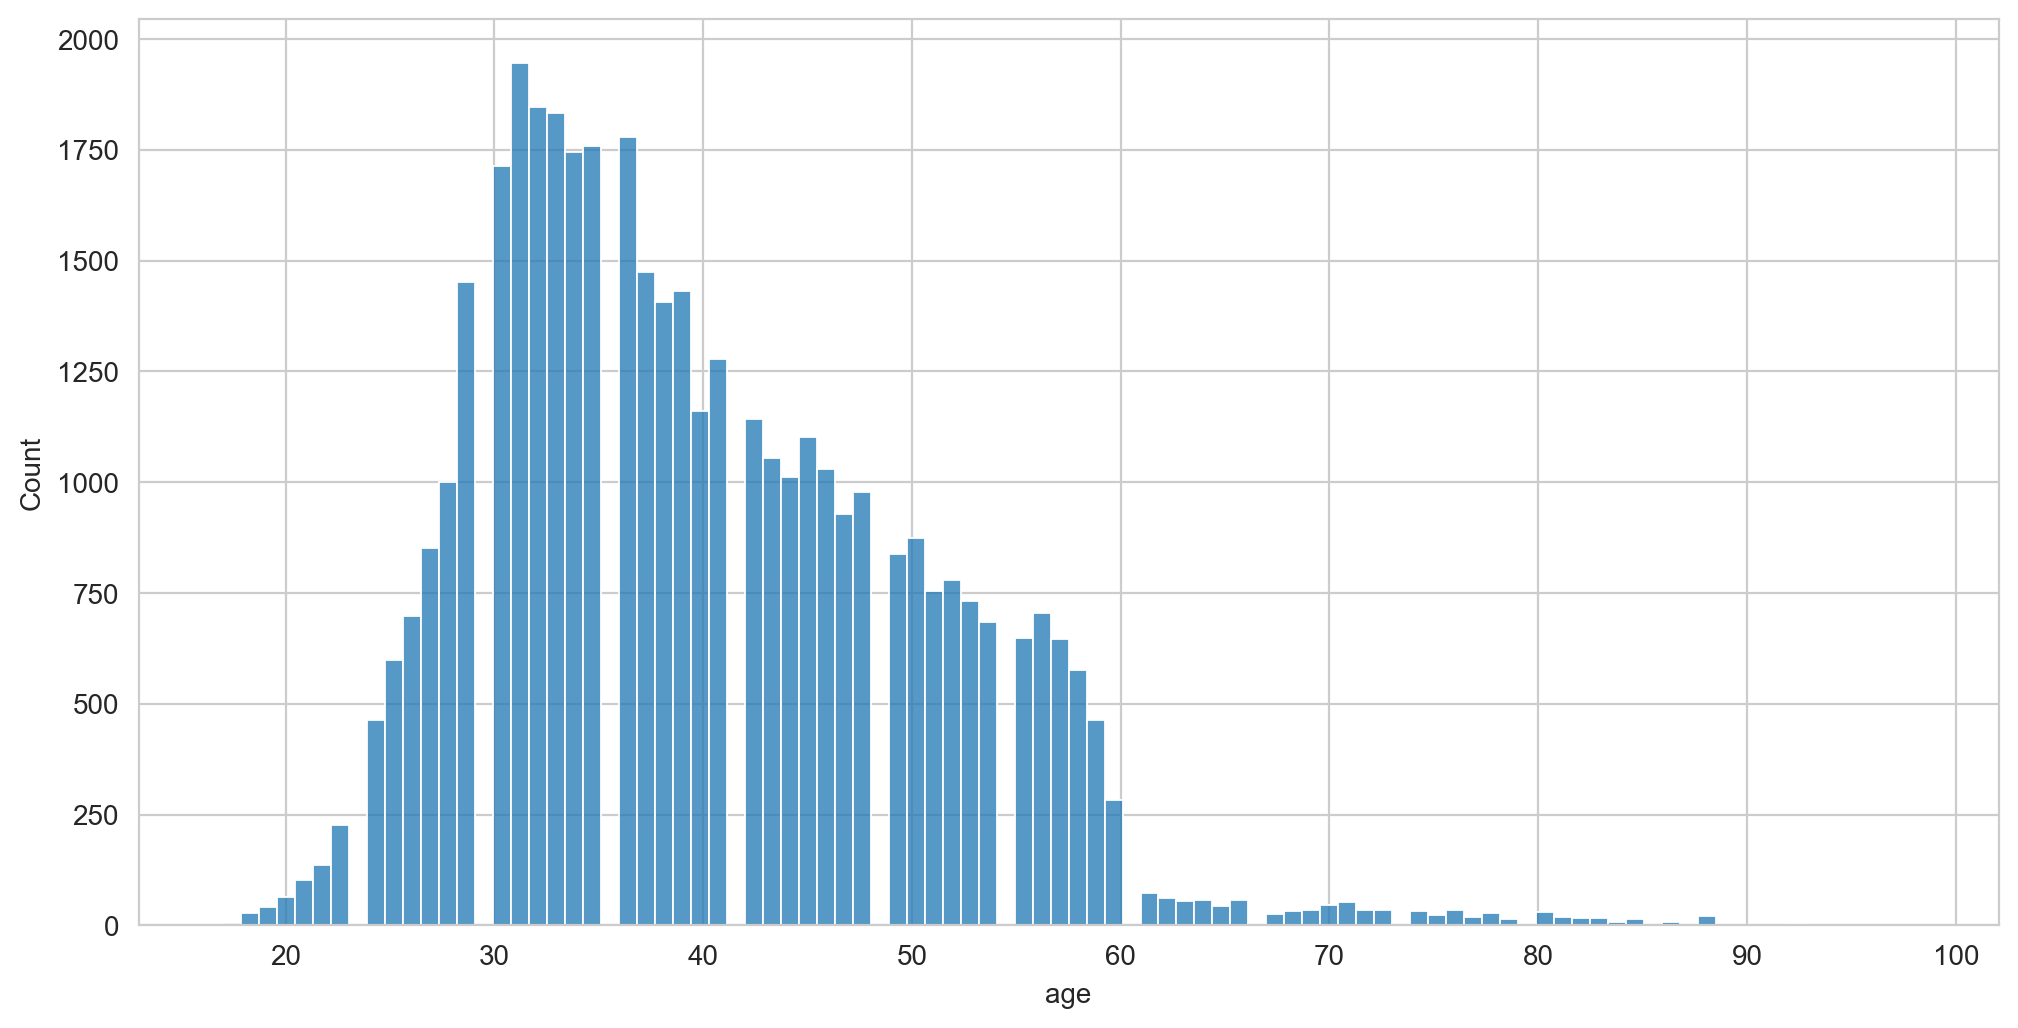

In [116]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='age')

In [117]:
# most peoples are between ages 30 to 40 

<AxesSubplot:xlabel='age', ylabel='Count'>

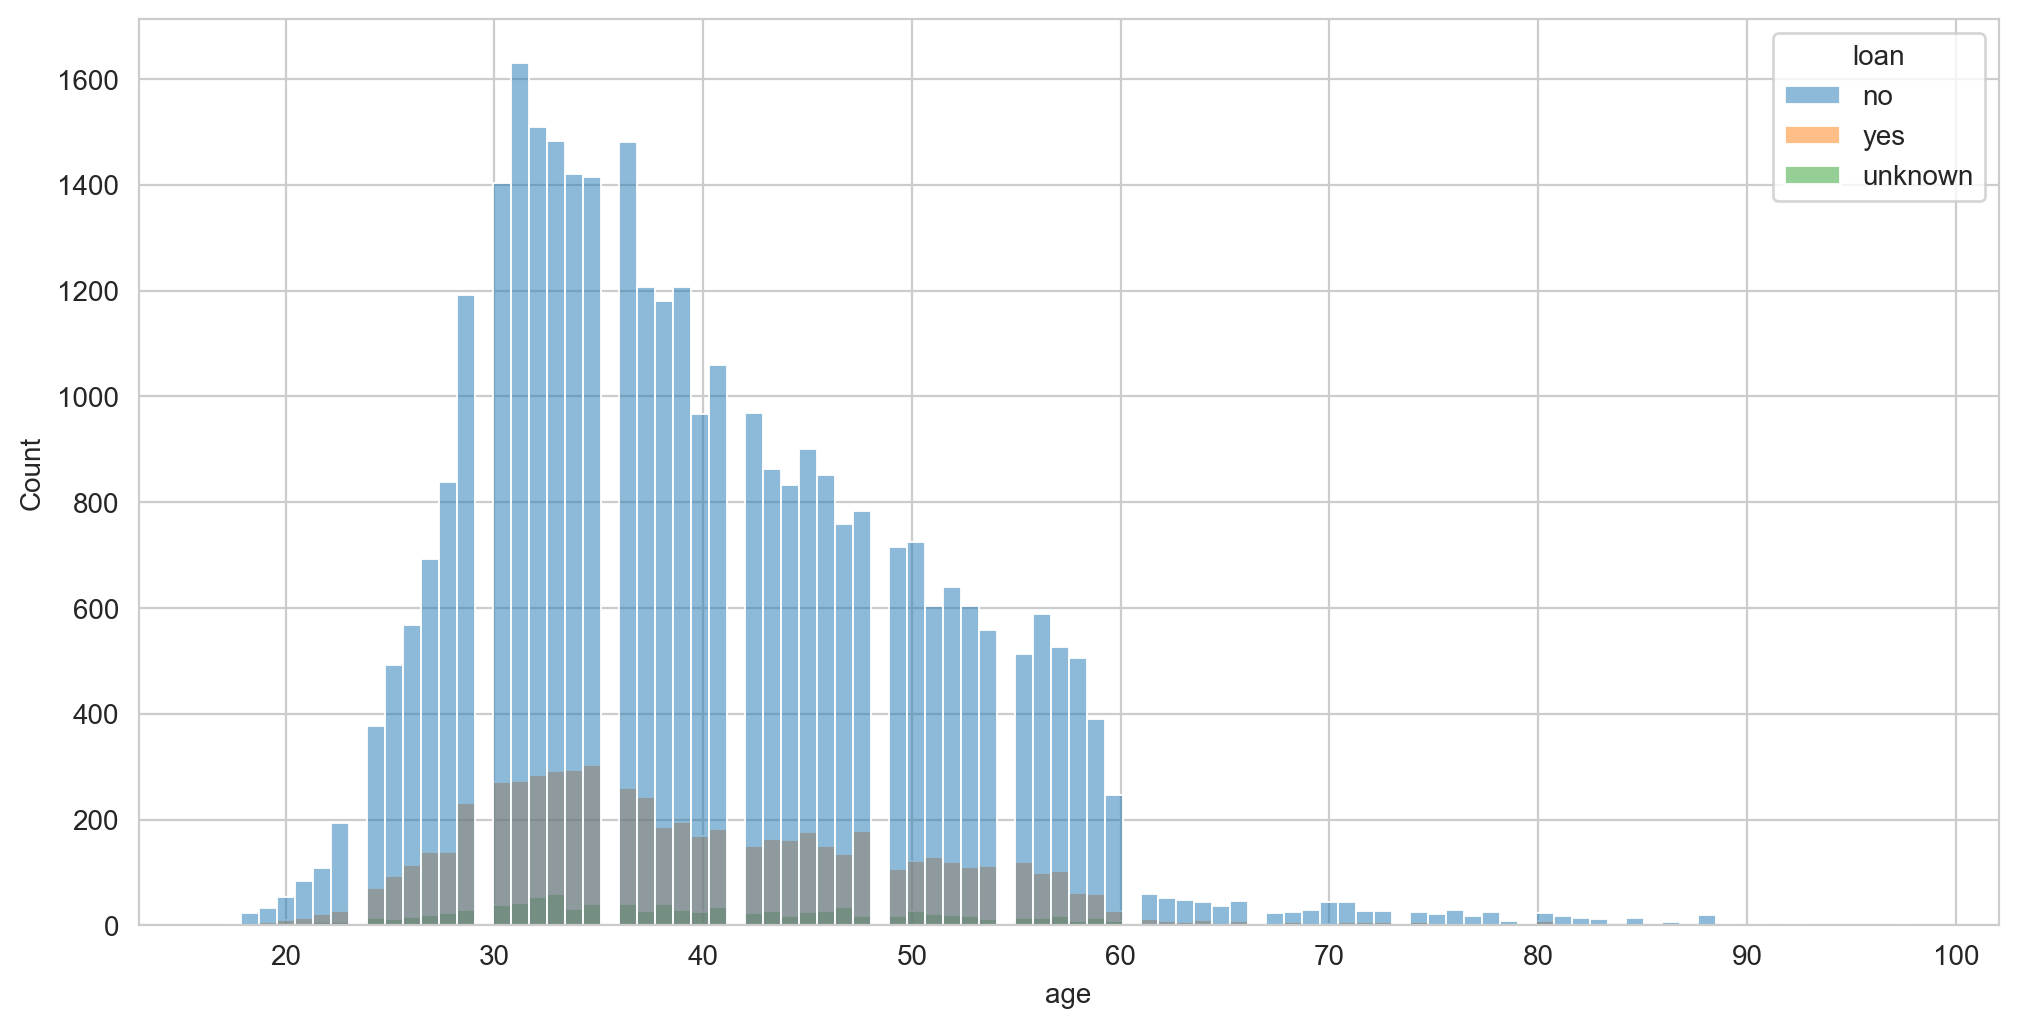

In [118]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='age',hue='loan')

In [119]:
# 3 clusters 
#1.peoples that currently dont have a loan (Blue color)
#2.peoples have the loan
#3.unknown
#majority of people dont have a loan

In [120]:
#pdays are no. of days passed by after the client was last contacted from 
#some sort of previous compaign

<AxesSubplot:xlabel='pdays', ylabel='Count'>

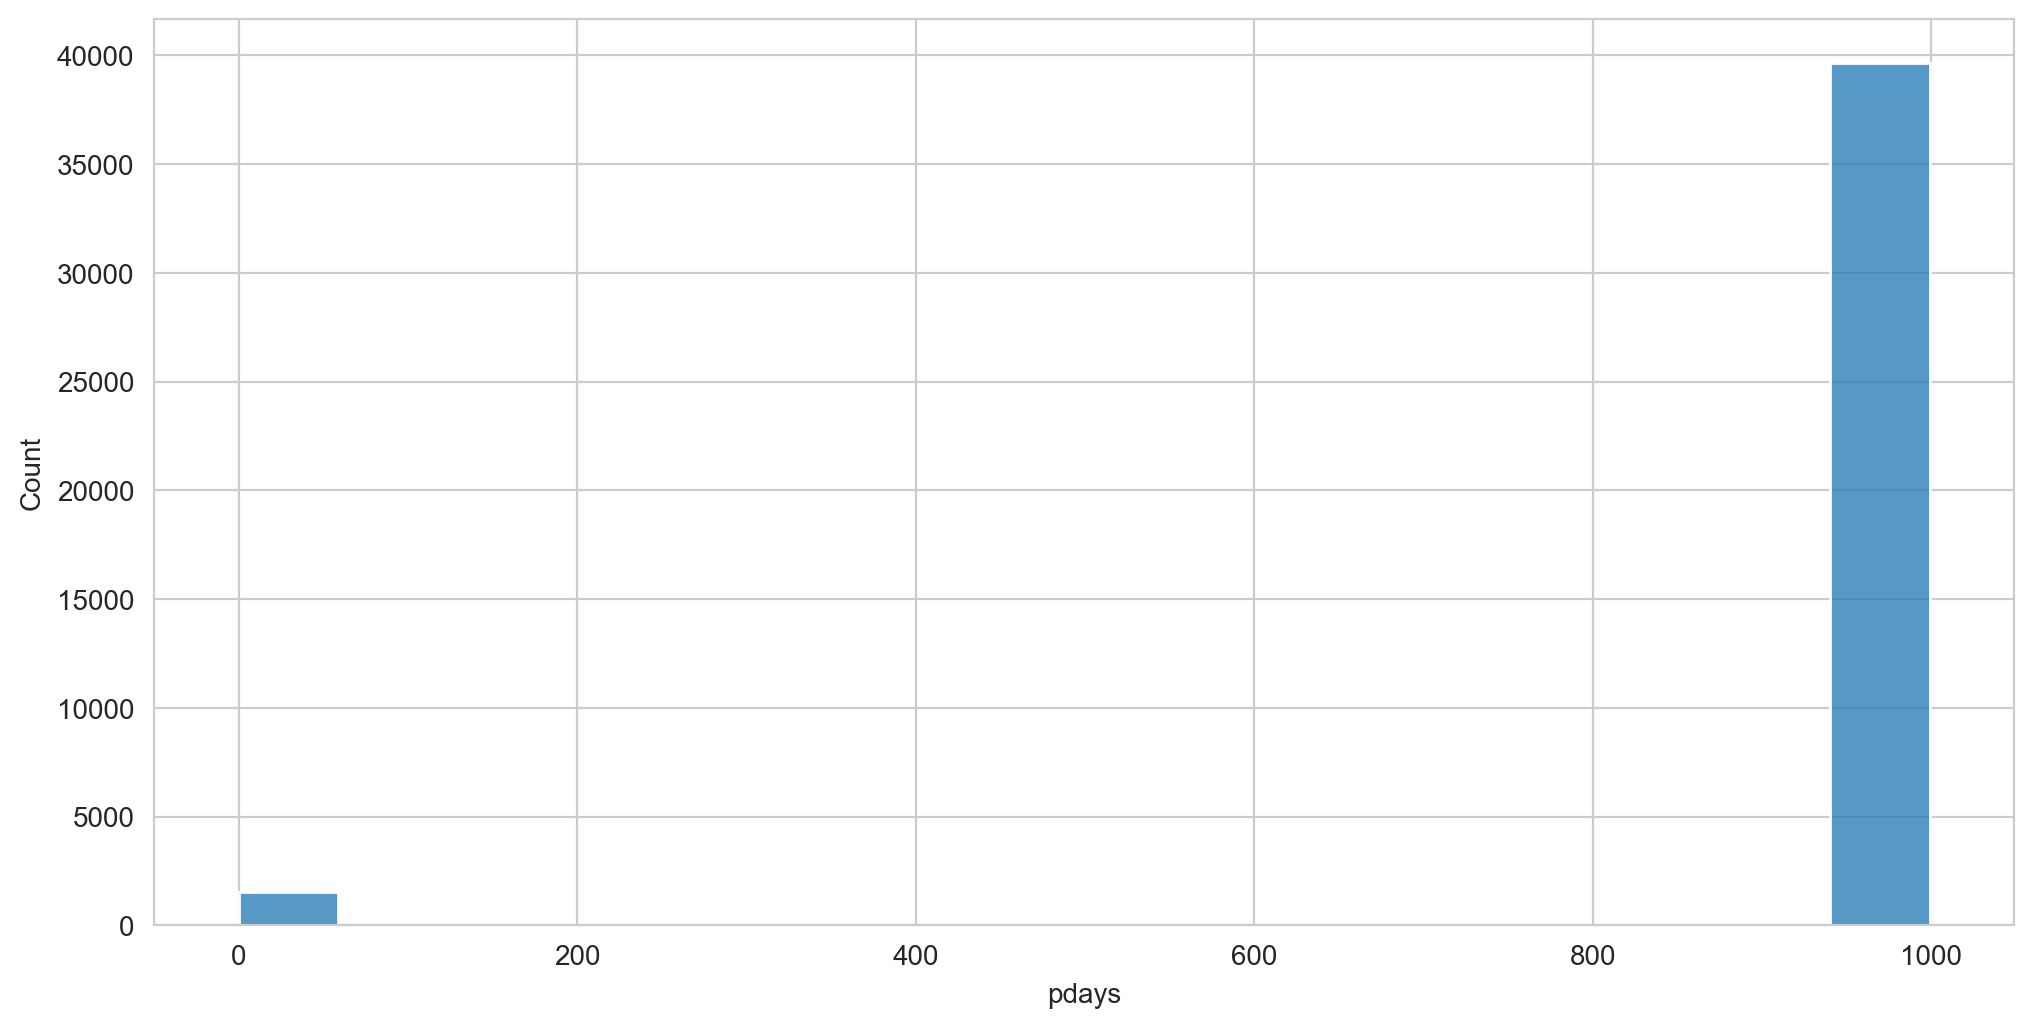

In [121]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='pdays')

In [122]:
#999 are the people that never been contacted for any marketing compaign
# In order to get some insight we shrink X limits or drop everyone at 999

<AxesSubplot:xlabel='pdays', ylabel='Count'>

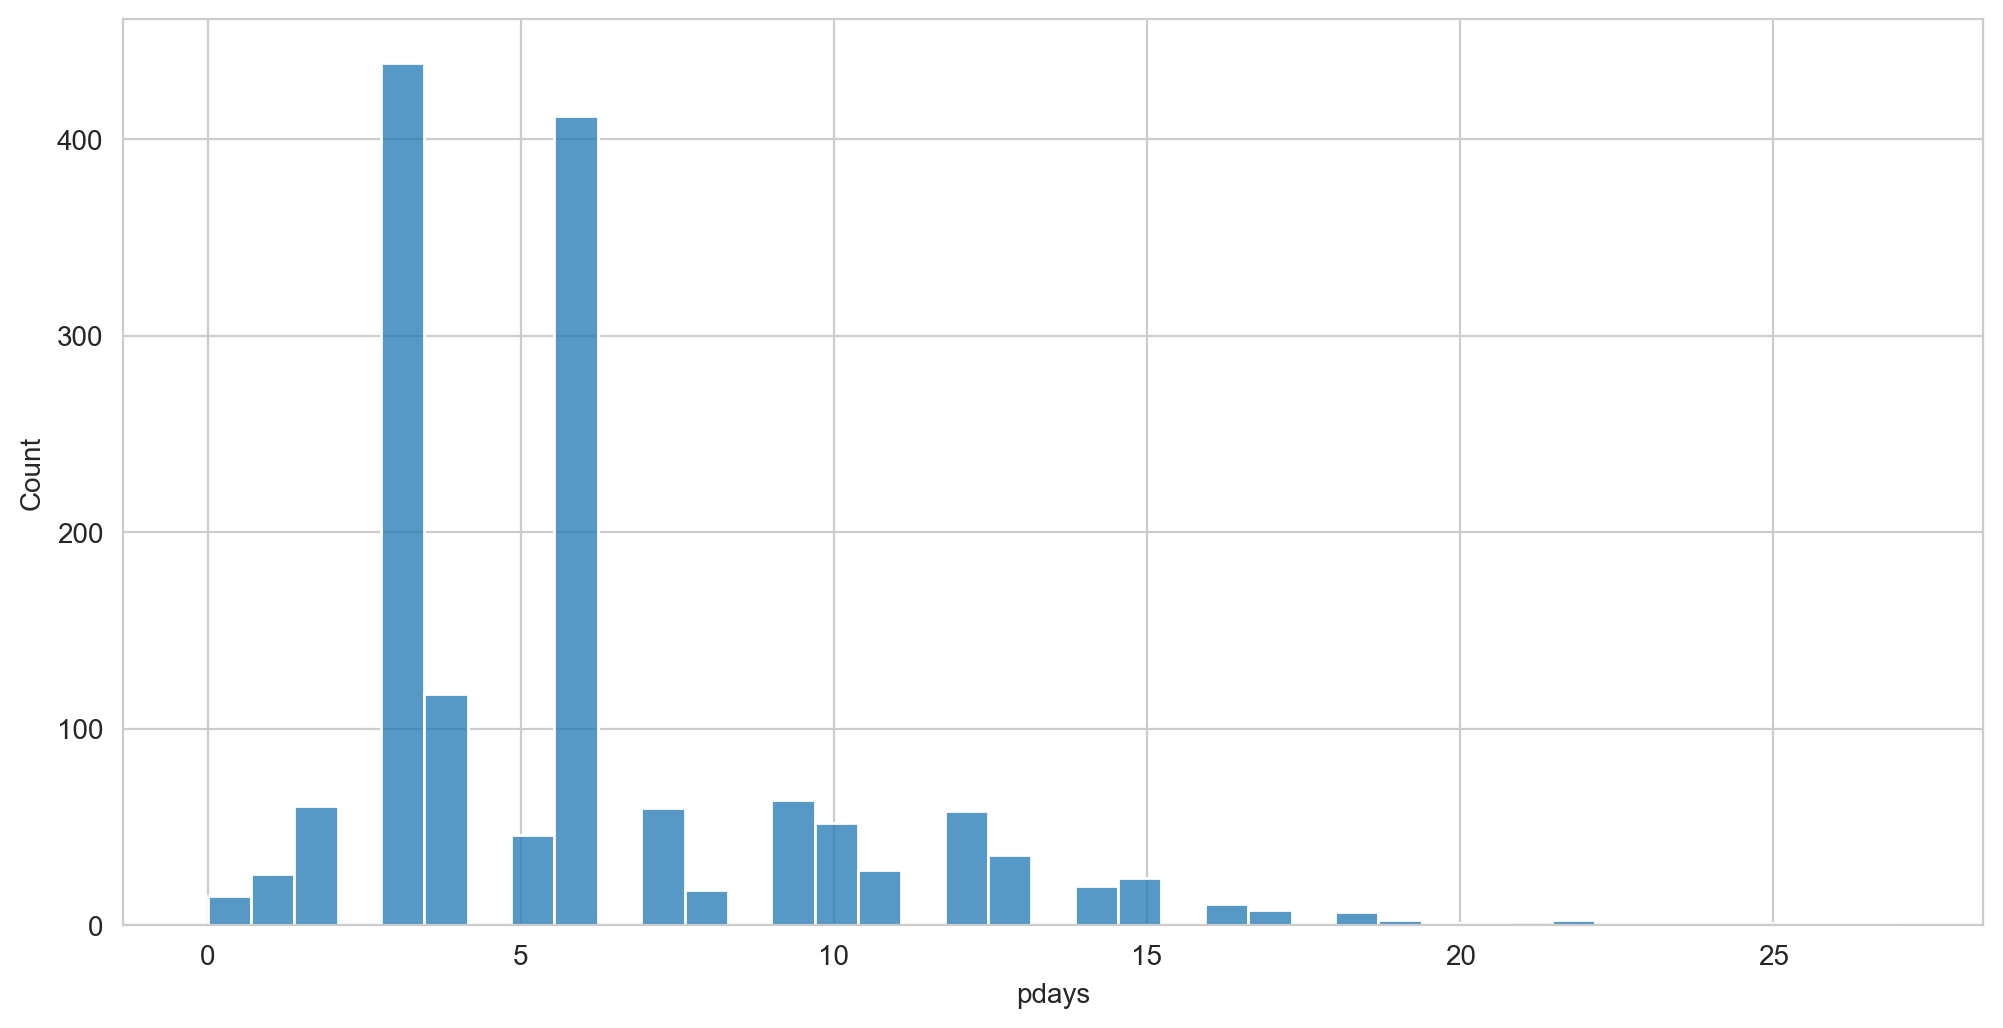

In [123]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df[df['pdays']!=999],x='pdays')

In [124]:
#Based of previous compaigns most people only had may be somehow btn 3 and 10days
# since they have been contacted

In [125]:
df['duration'].unique()

array([ 261,  149,  226, ..., 1246, 1556, 1868], dtype=int64)

In [126]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

<AxesSubplot:xlabel='contact', ylabel='count'>

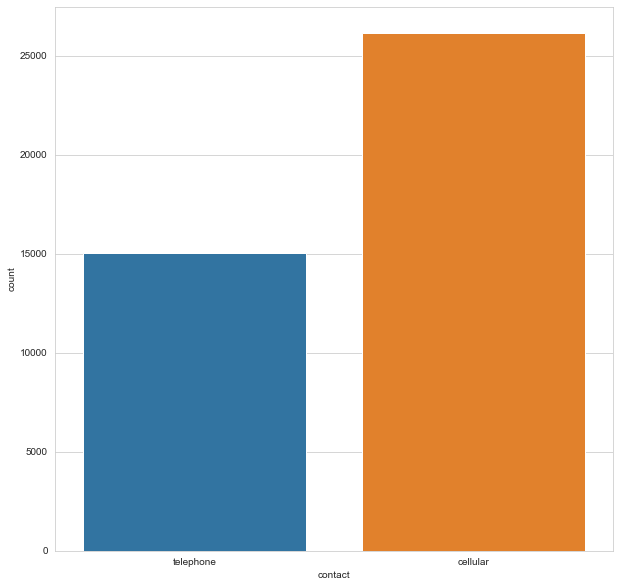

In [127]:
sns.countplot(data=df,x='contact')

<AxesSubplot:xlabel='duration', ylabel='Count'>

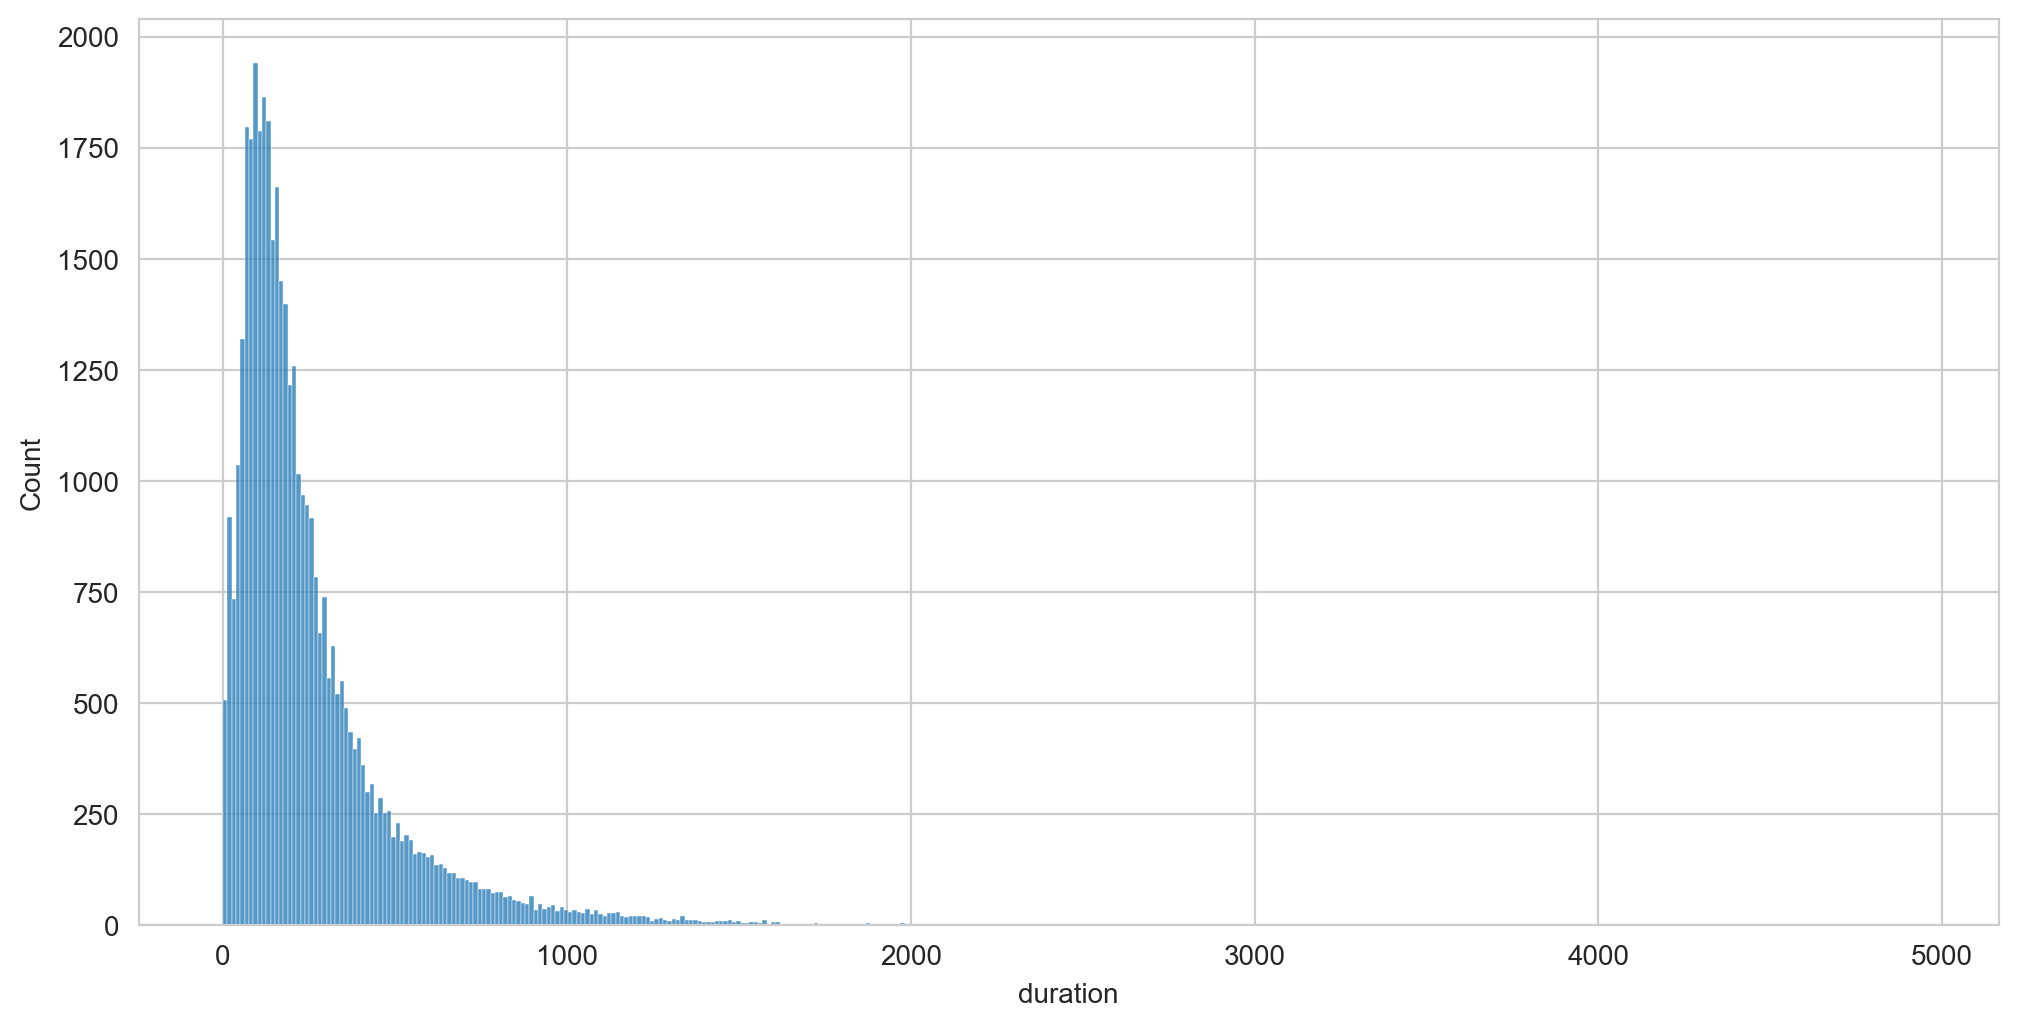

In [128]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='duration')

In [129]:
#Few cases had super long duration time over 2000 sec
#majority of people had a call betn 0 and 10 min mark

<AxesSubplot:xlabel='duration', ylabel='Count'>

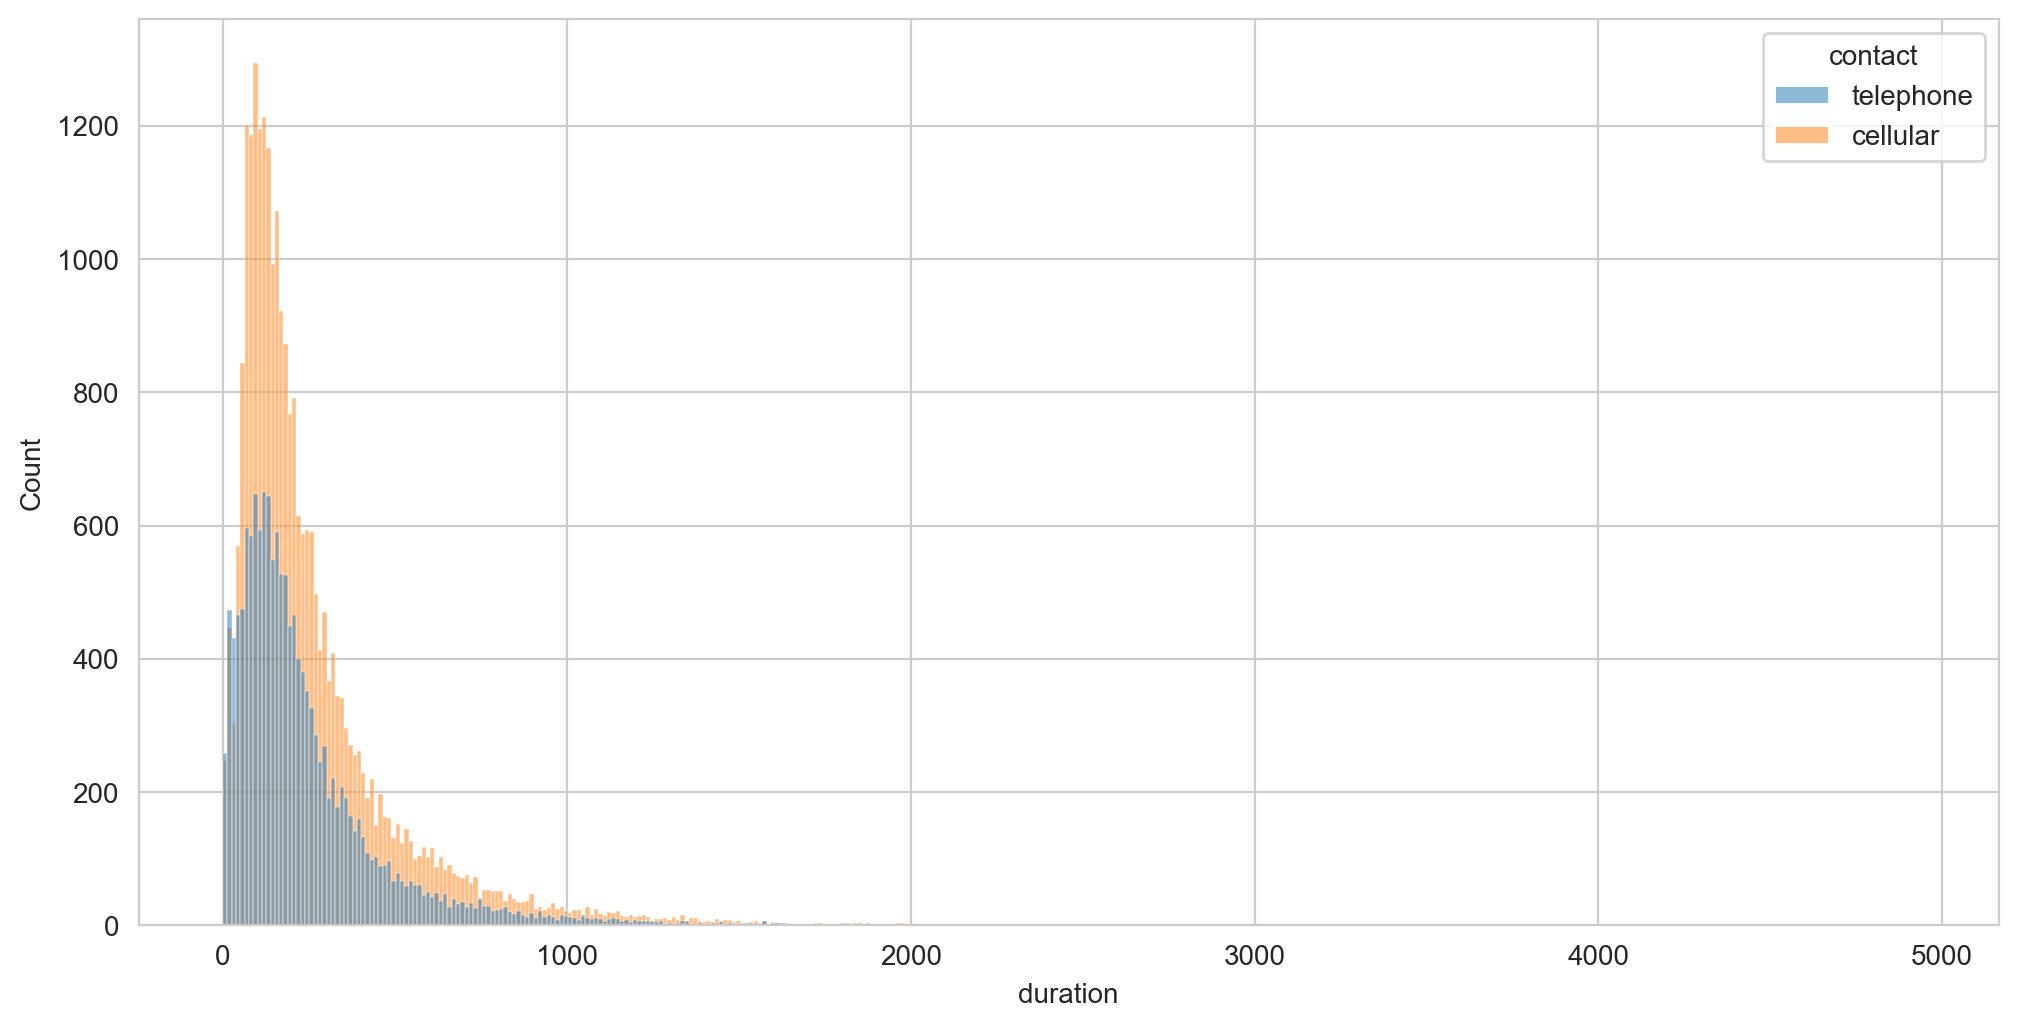

In [130]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='duration',hue='contact')

In [131]:
#the distribution is very much almost same only the cellular had a higher 
#count than telephone but behaviour of the distribution is extremely similar
# we see the further by manually editing x limit

(0.0, 2000.0)

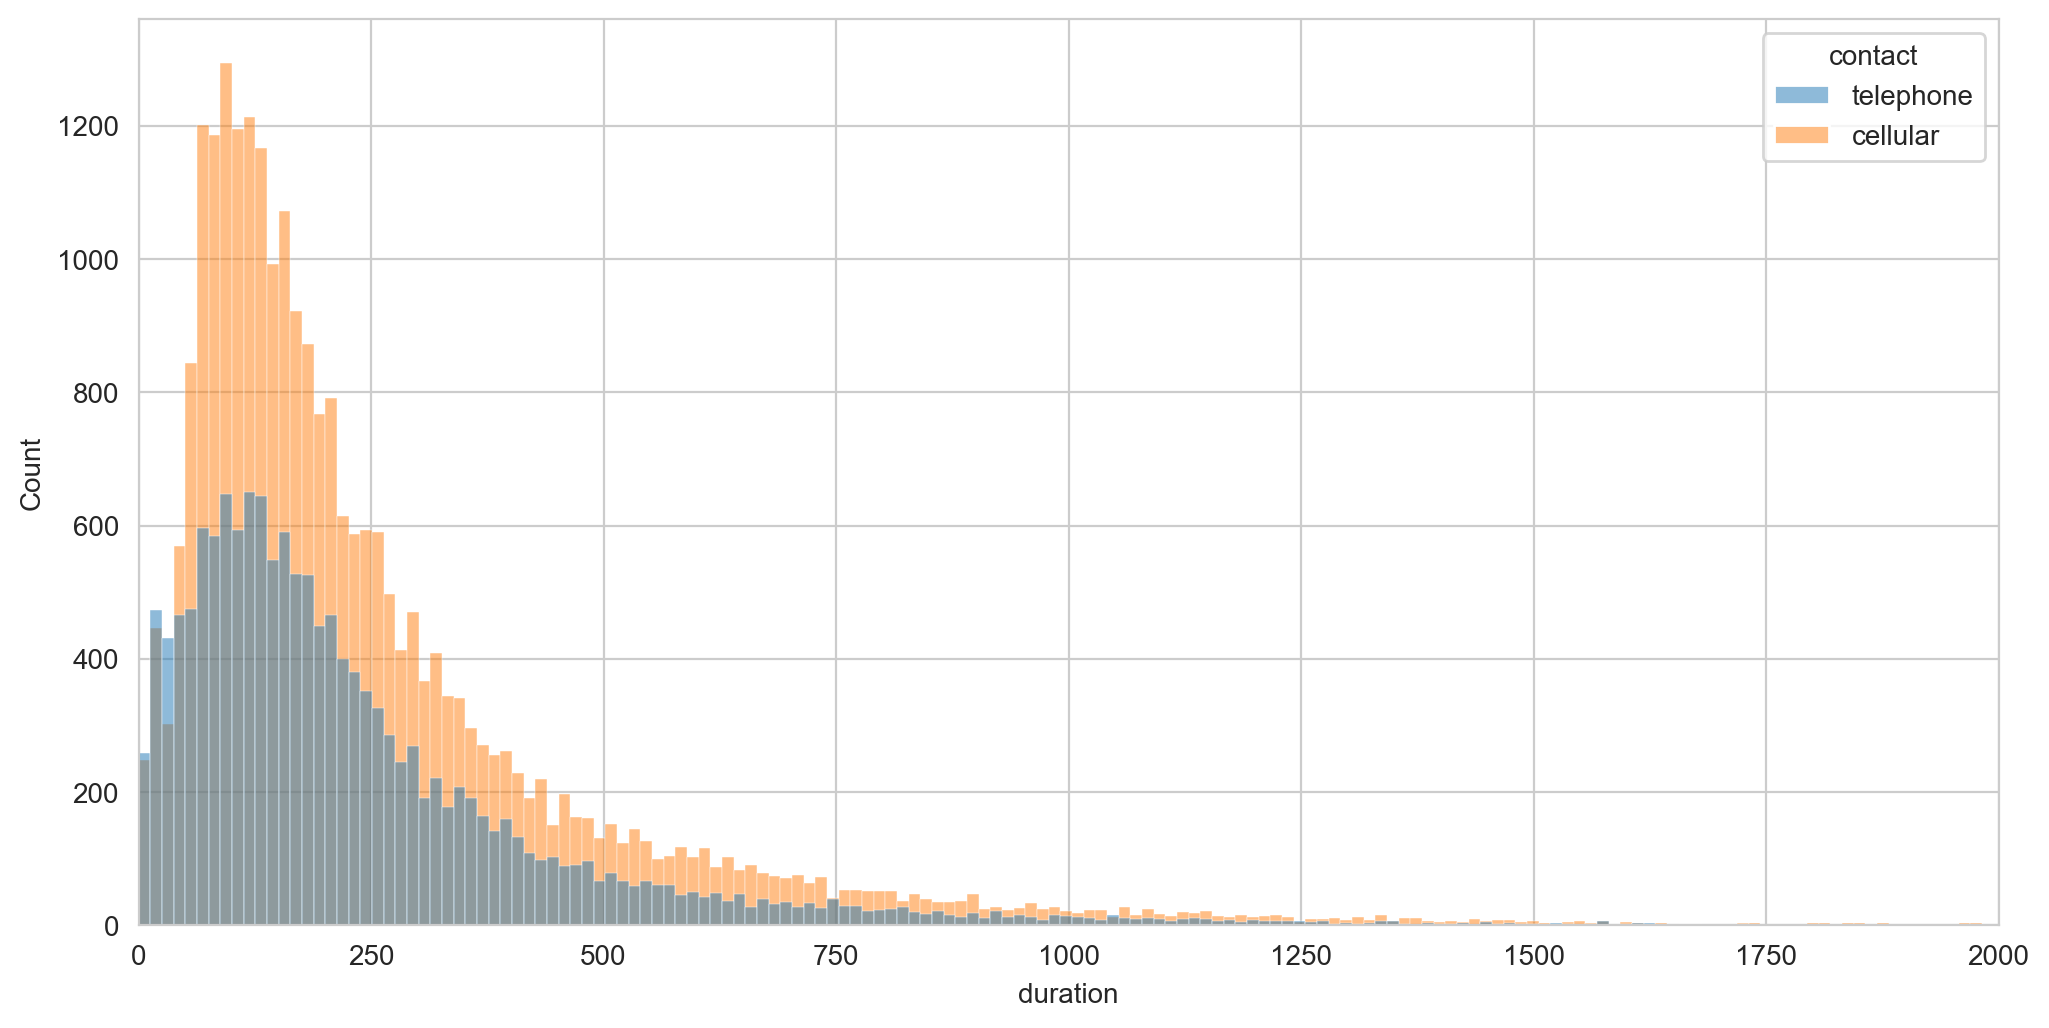

In [132]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='duration',hue='contact')
plt.xlim(0,2000)

<AxesSubplot:xlabel='contact', ylabel='count'>

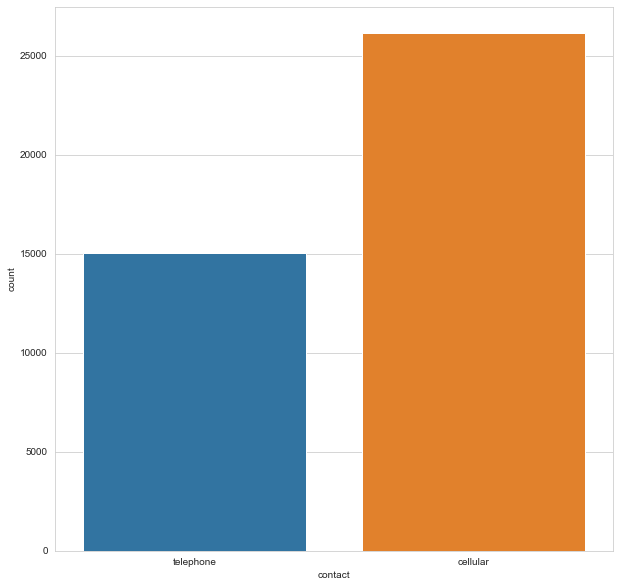

In [133]:
sns.countplot(data=df,x='contact')
#whether you conatcting someone on cellphone or landline avg call time doesnt 
#make a difference

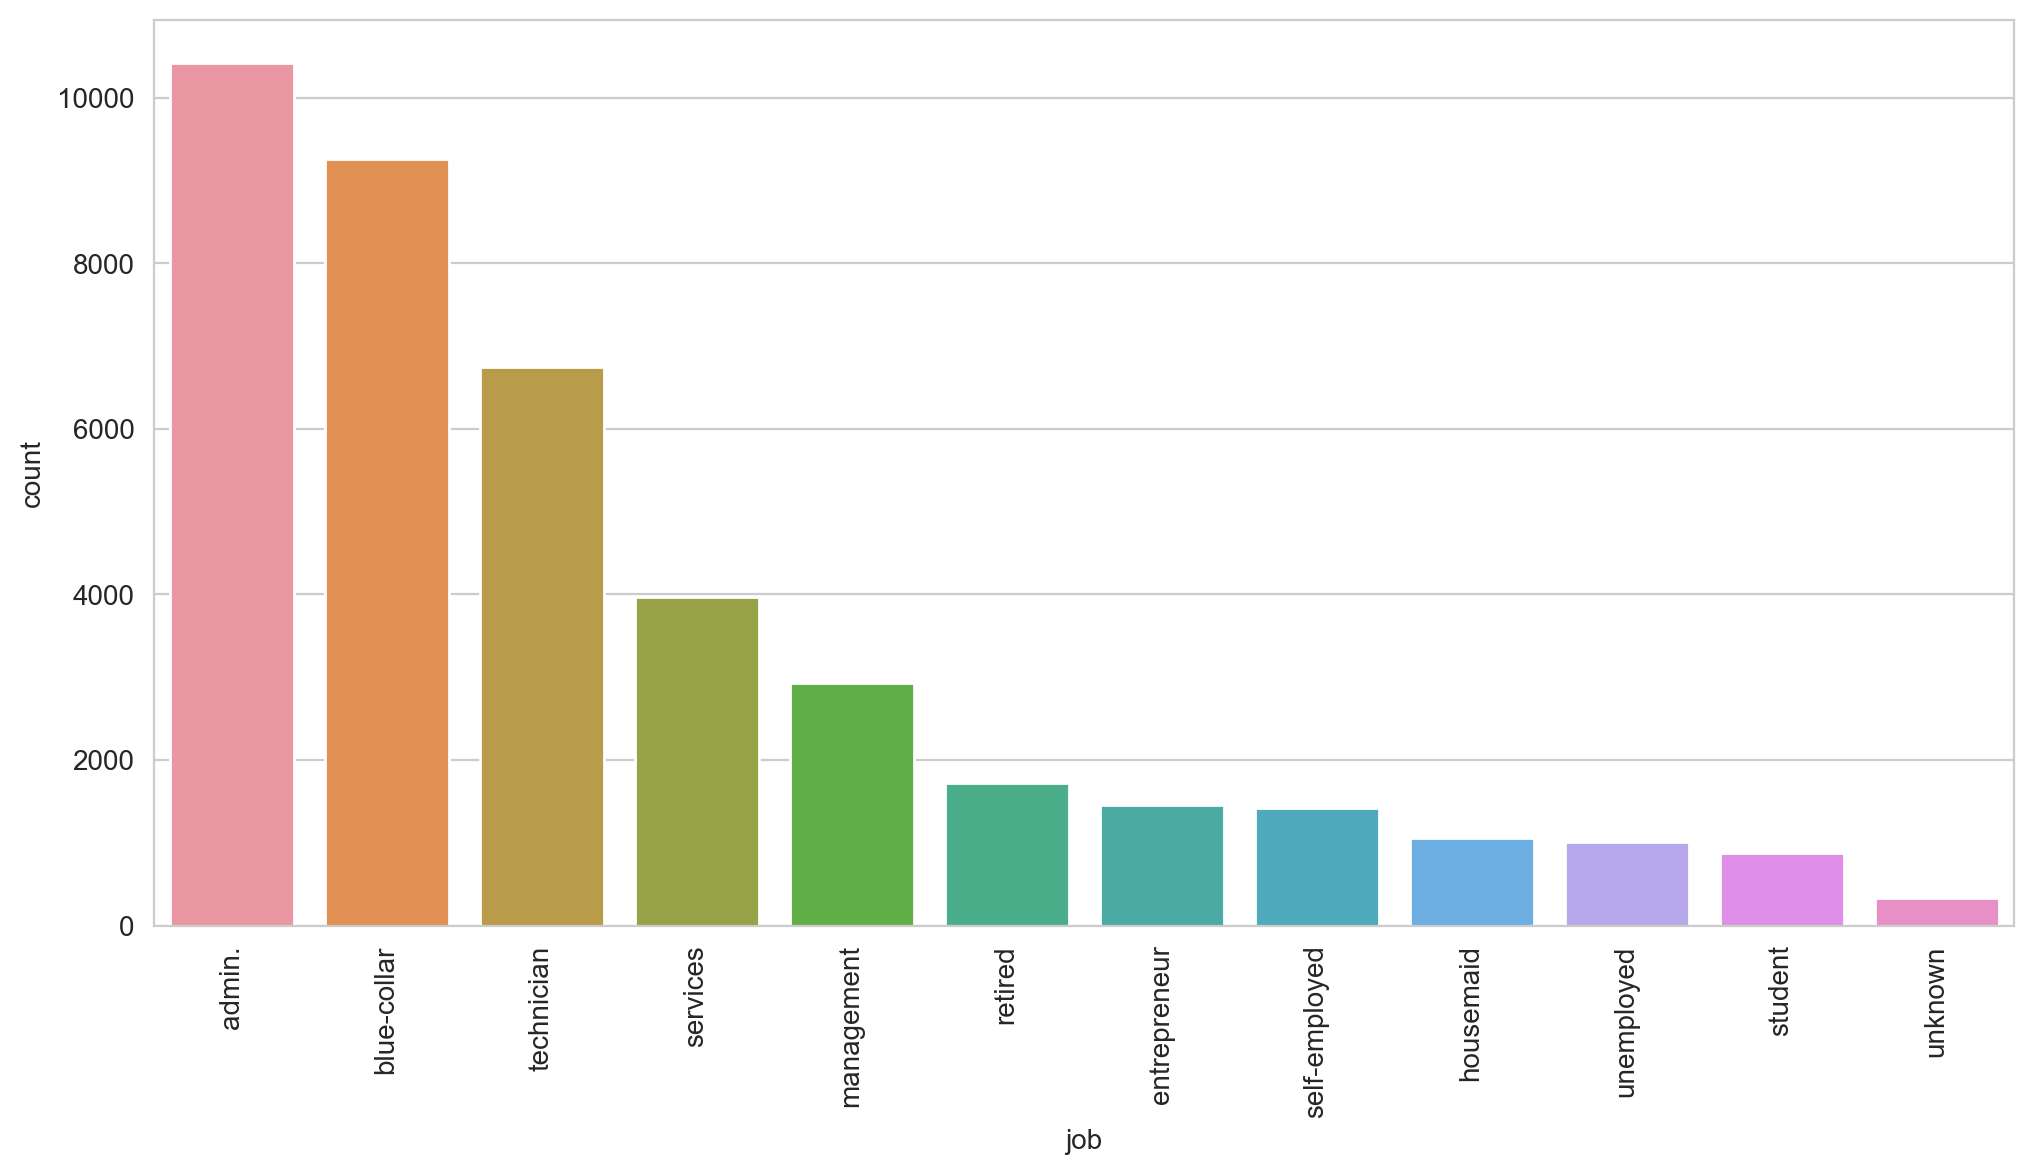

In [134]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='job',order=df['job'].value_counts().index)
plt.xticks(rotation=90);

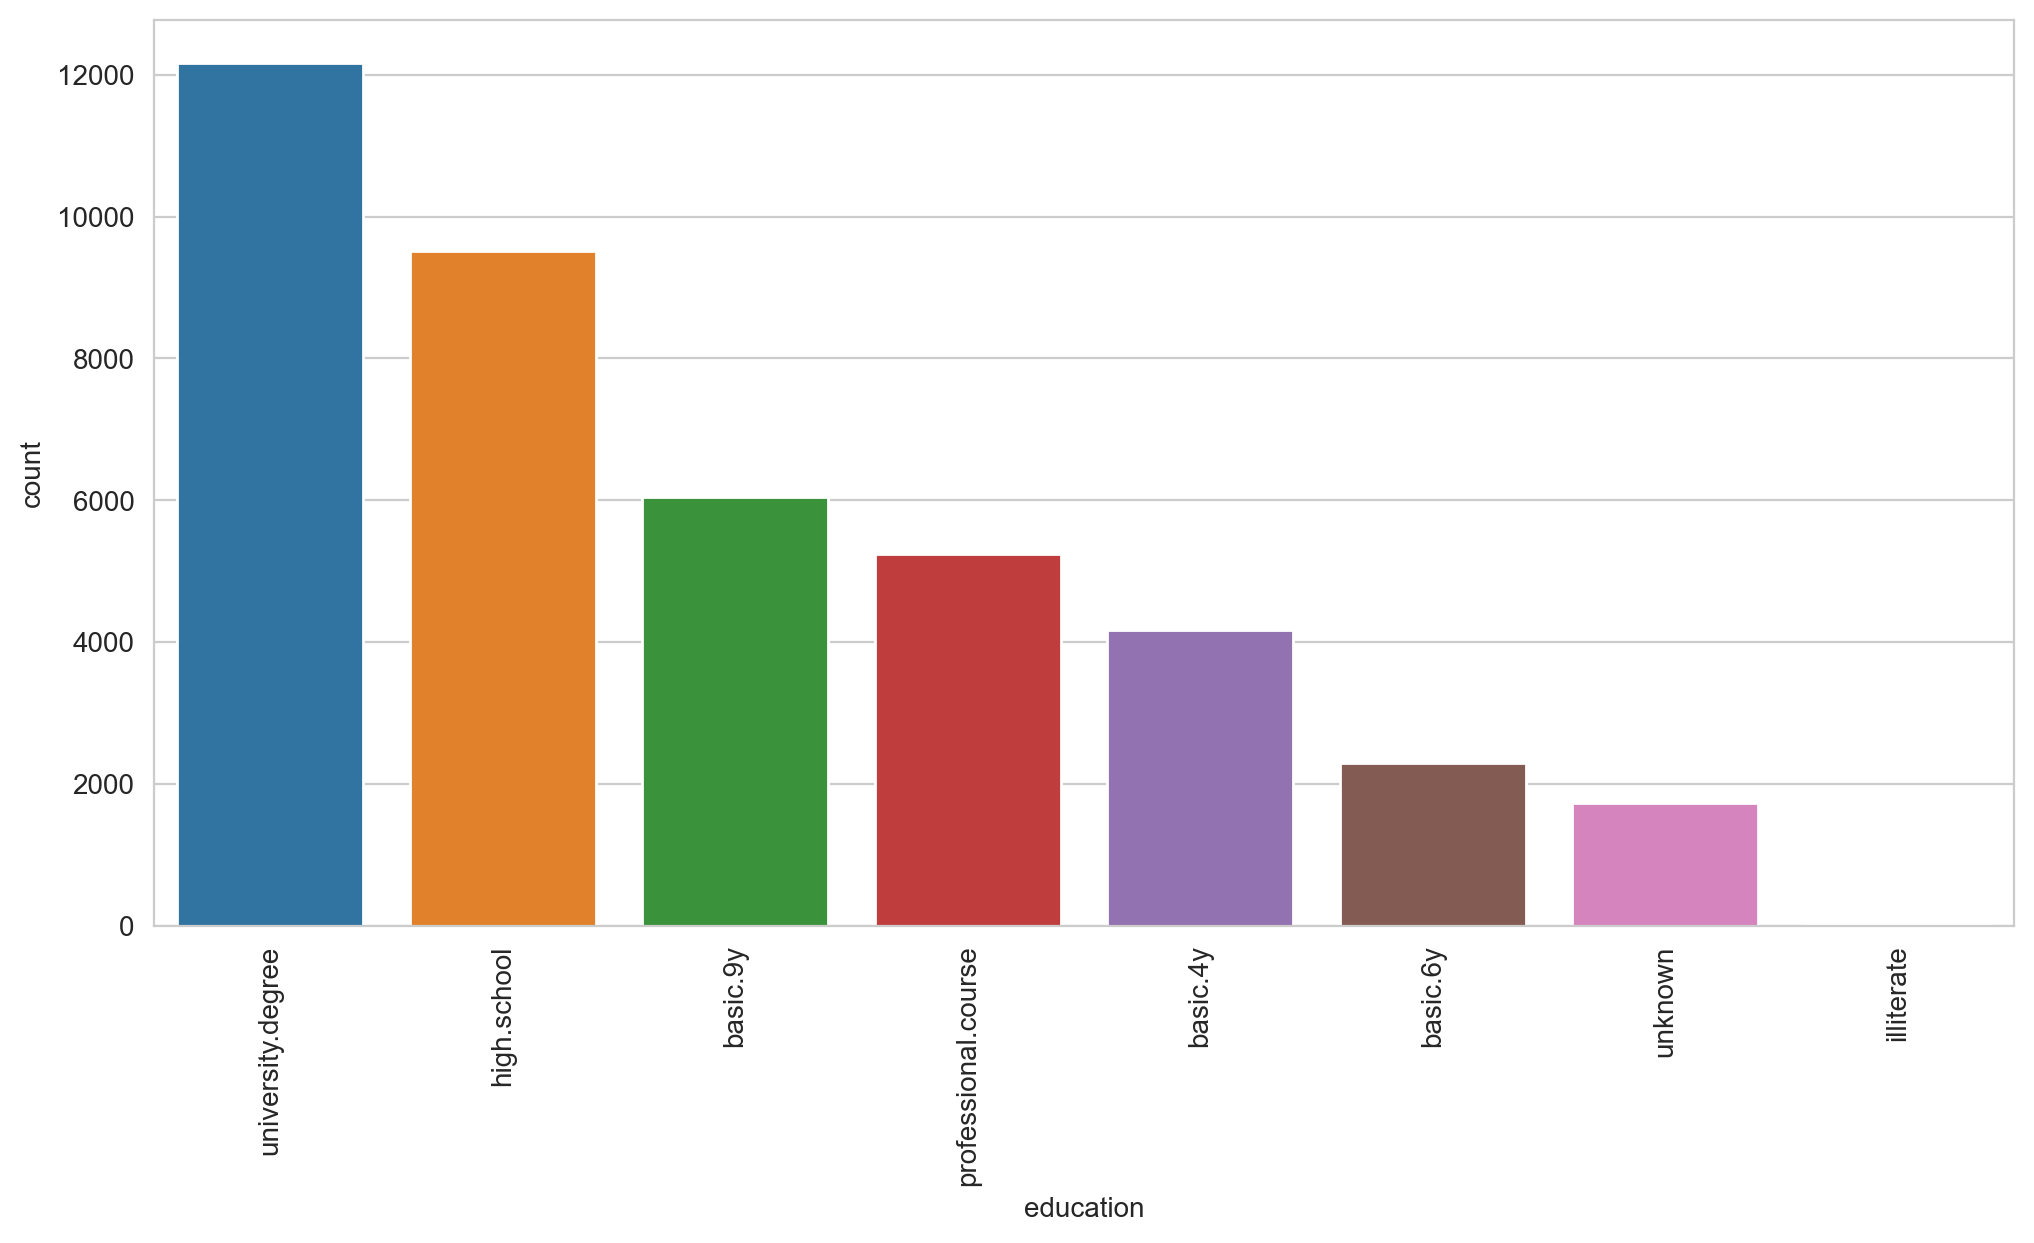

In [135]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='education',order=df['education'].value_counts().index)
plt.xticks(rotation=90);

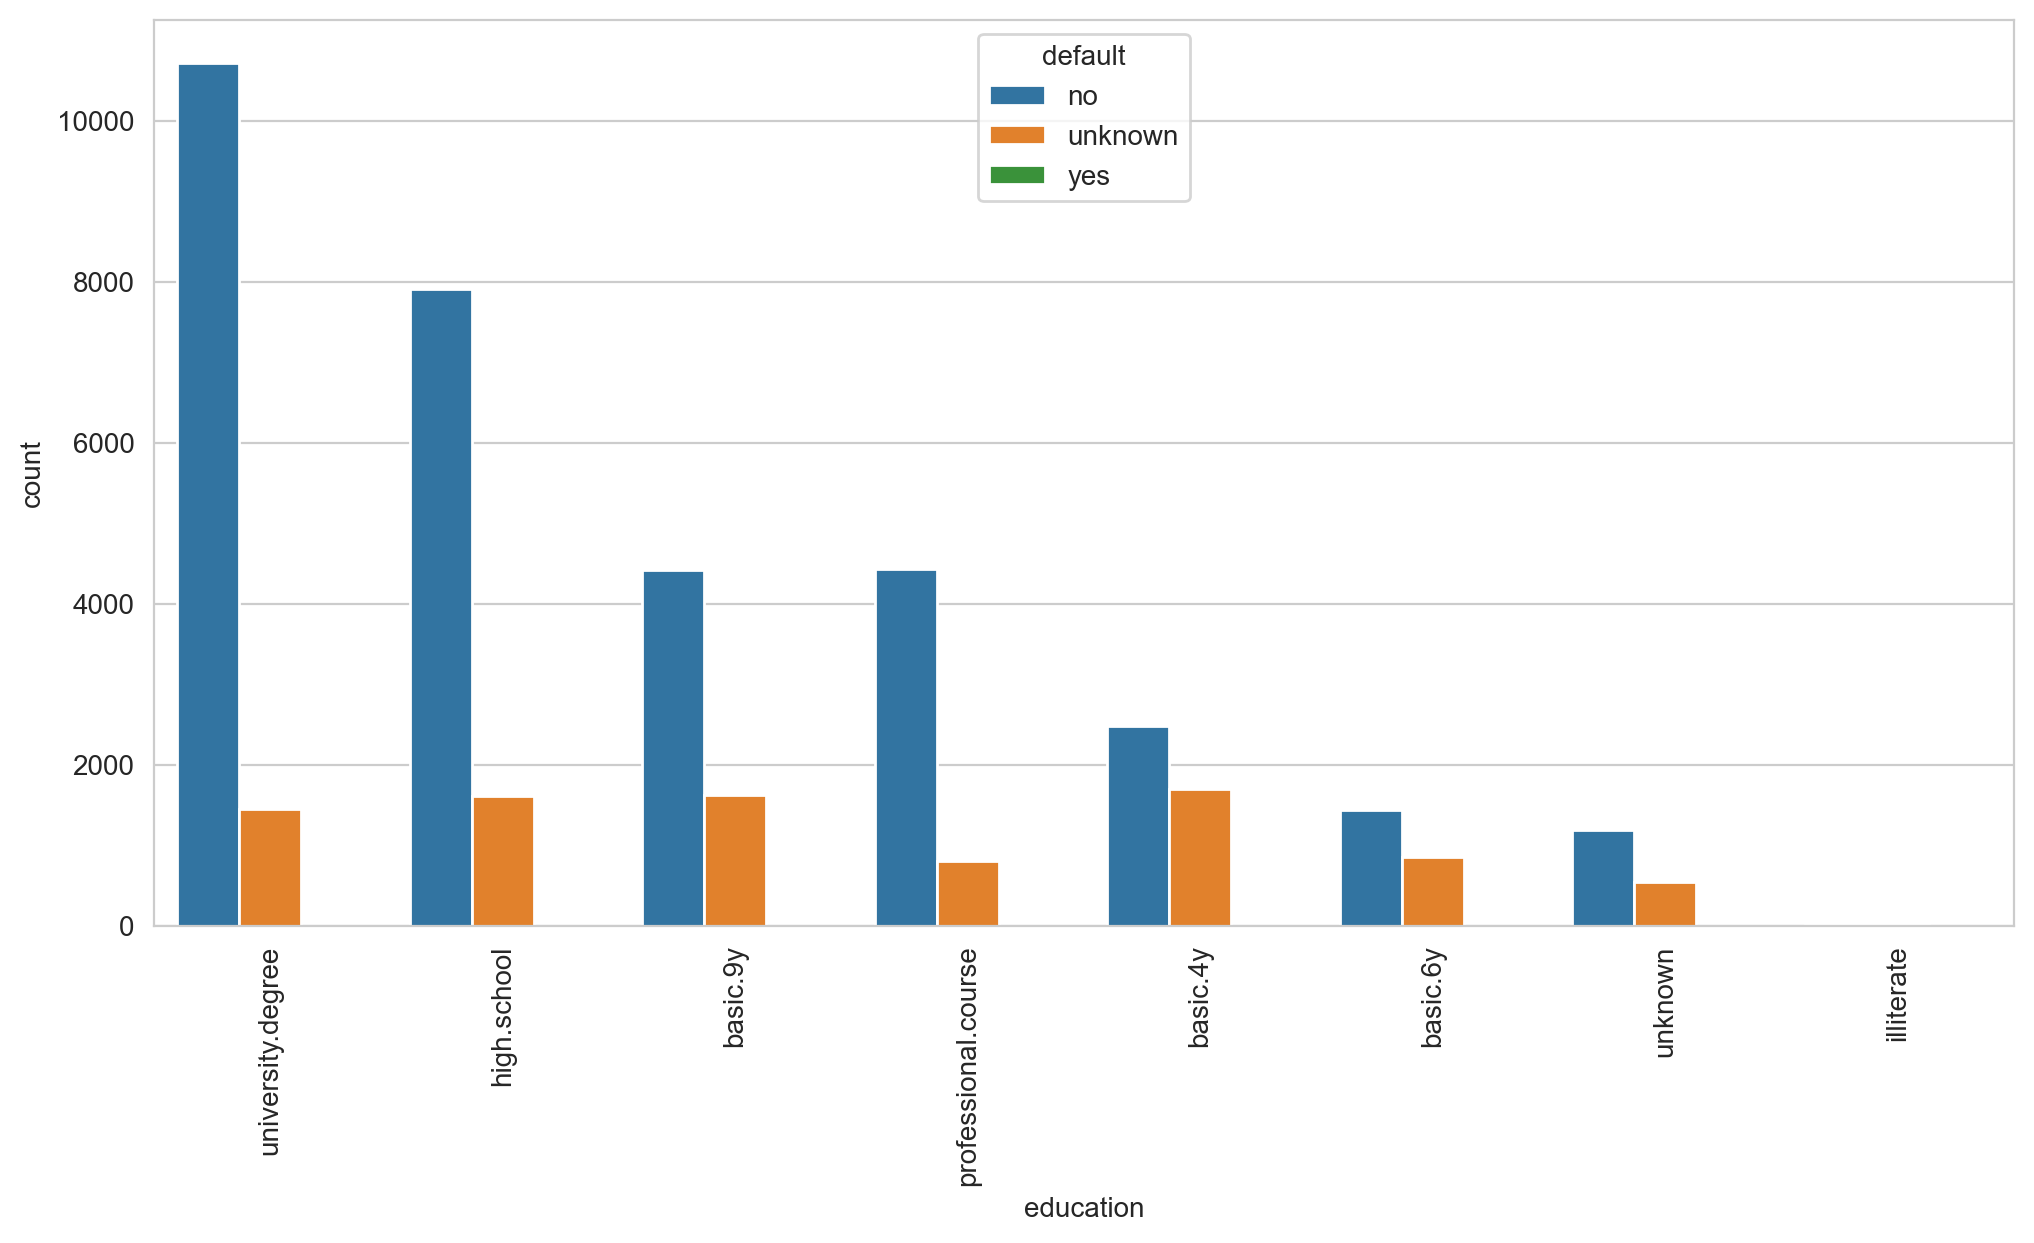

In [136]:
#whether their a relationship btn education and they default a loan?
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='education',order=df['education'].value_counts().index,hue='default')
plt.xticks(rotation=90);

In [137]:
#no default and unknown might be the loan is going on

### Creating and Fitting a KMeans Model

Note of our method choices here:

* fit(X[, y, sample_weight])
    * Compute k-means clustering.

* fit_predict(X[, y, sample_weight])
    * Compute cluster centers and predict cluster index for each sample.

* fit_transform(X[, y, sample_weight])
    * Compute clustering and transform X to cluster-distance space.

* predict(X[, sample_weight])
    * Predict the closest cluster each sample in X belongs to.

In [138]:
X = pd.get_dummies(df)

In [139]:
from sklearn.preprocessing import StandardScaler

In [140]:
scaler = StandardScaler()

In [141]:
scaled_X = scaler.fit_transform(X)

In [142]:
from sklearn.cluster import KMeans

In [143]:
model = KMeans(n_clusters=2)

In [144]:
#fit_predict is same as fit transform
#fit runs the Kmeans and locate whether the clusters centers are and then the 
#predict will map out the X values and check what the cluster centers they are closest to
cluster_labels = model.fit_predict(scaled_X)

In [145]:
cluster_labels

array([0, 0, 0, ..., 1, 1, 1])

In [146]:
len(scaled_X)

41188

In [147]:
X['Cluster'] = cluster_labels

<AxesSubplot:>

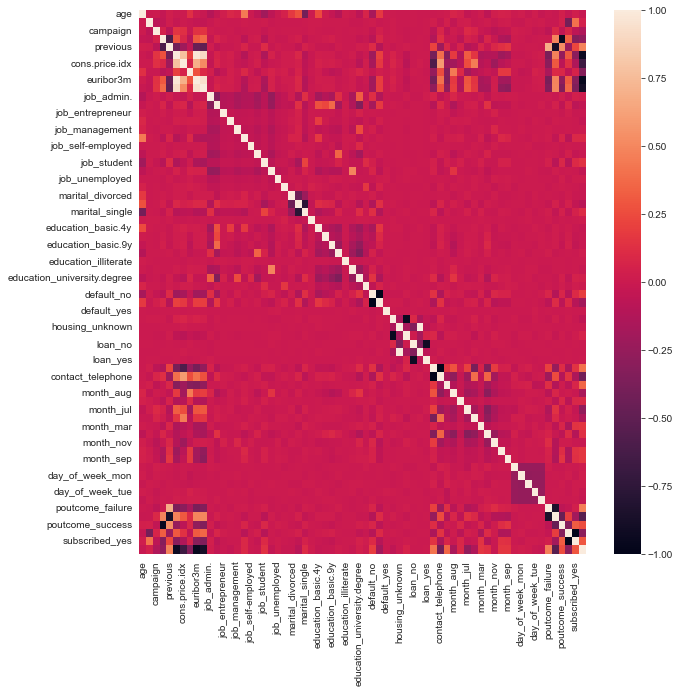

In [148]:
sns.heatmap(X.corr())

In [149]:
X.corr()['Cluster']

age                    -0.019767
duration                0.039581
campaign               -0.129103
pdays                  -0.267714
previous                0.478493
                          ...   
poutcome_nonexistent   -0.544406
poutcome_success        0.254406
subscribed_no          -0.294472
subscribed_yes          0.294472
Cluster                 1.000000
Name: Cluster, Length: 66, dtype: float64

In [150]:
X.corr()['Cluster'].iloc[:-1].sort_values()

euribor3m              -0.959328
emp.var.rate           -0.932622
nr.employed            -0.886190
cons.price.idx         -0.679350
poutcome_nonexistent   -0.544406
                          ...   
subscribed_yes          0.294472
month_apr               0.357942
contact_cellular        0.410444
poutcome_failure        0.464320
previous                0.478493
Name: Cluster, Length: 65, dtype: float64

<AxesSubplot:>

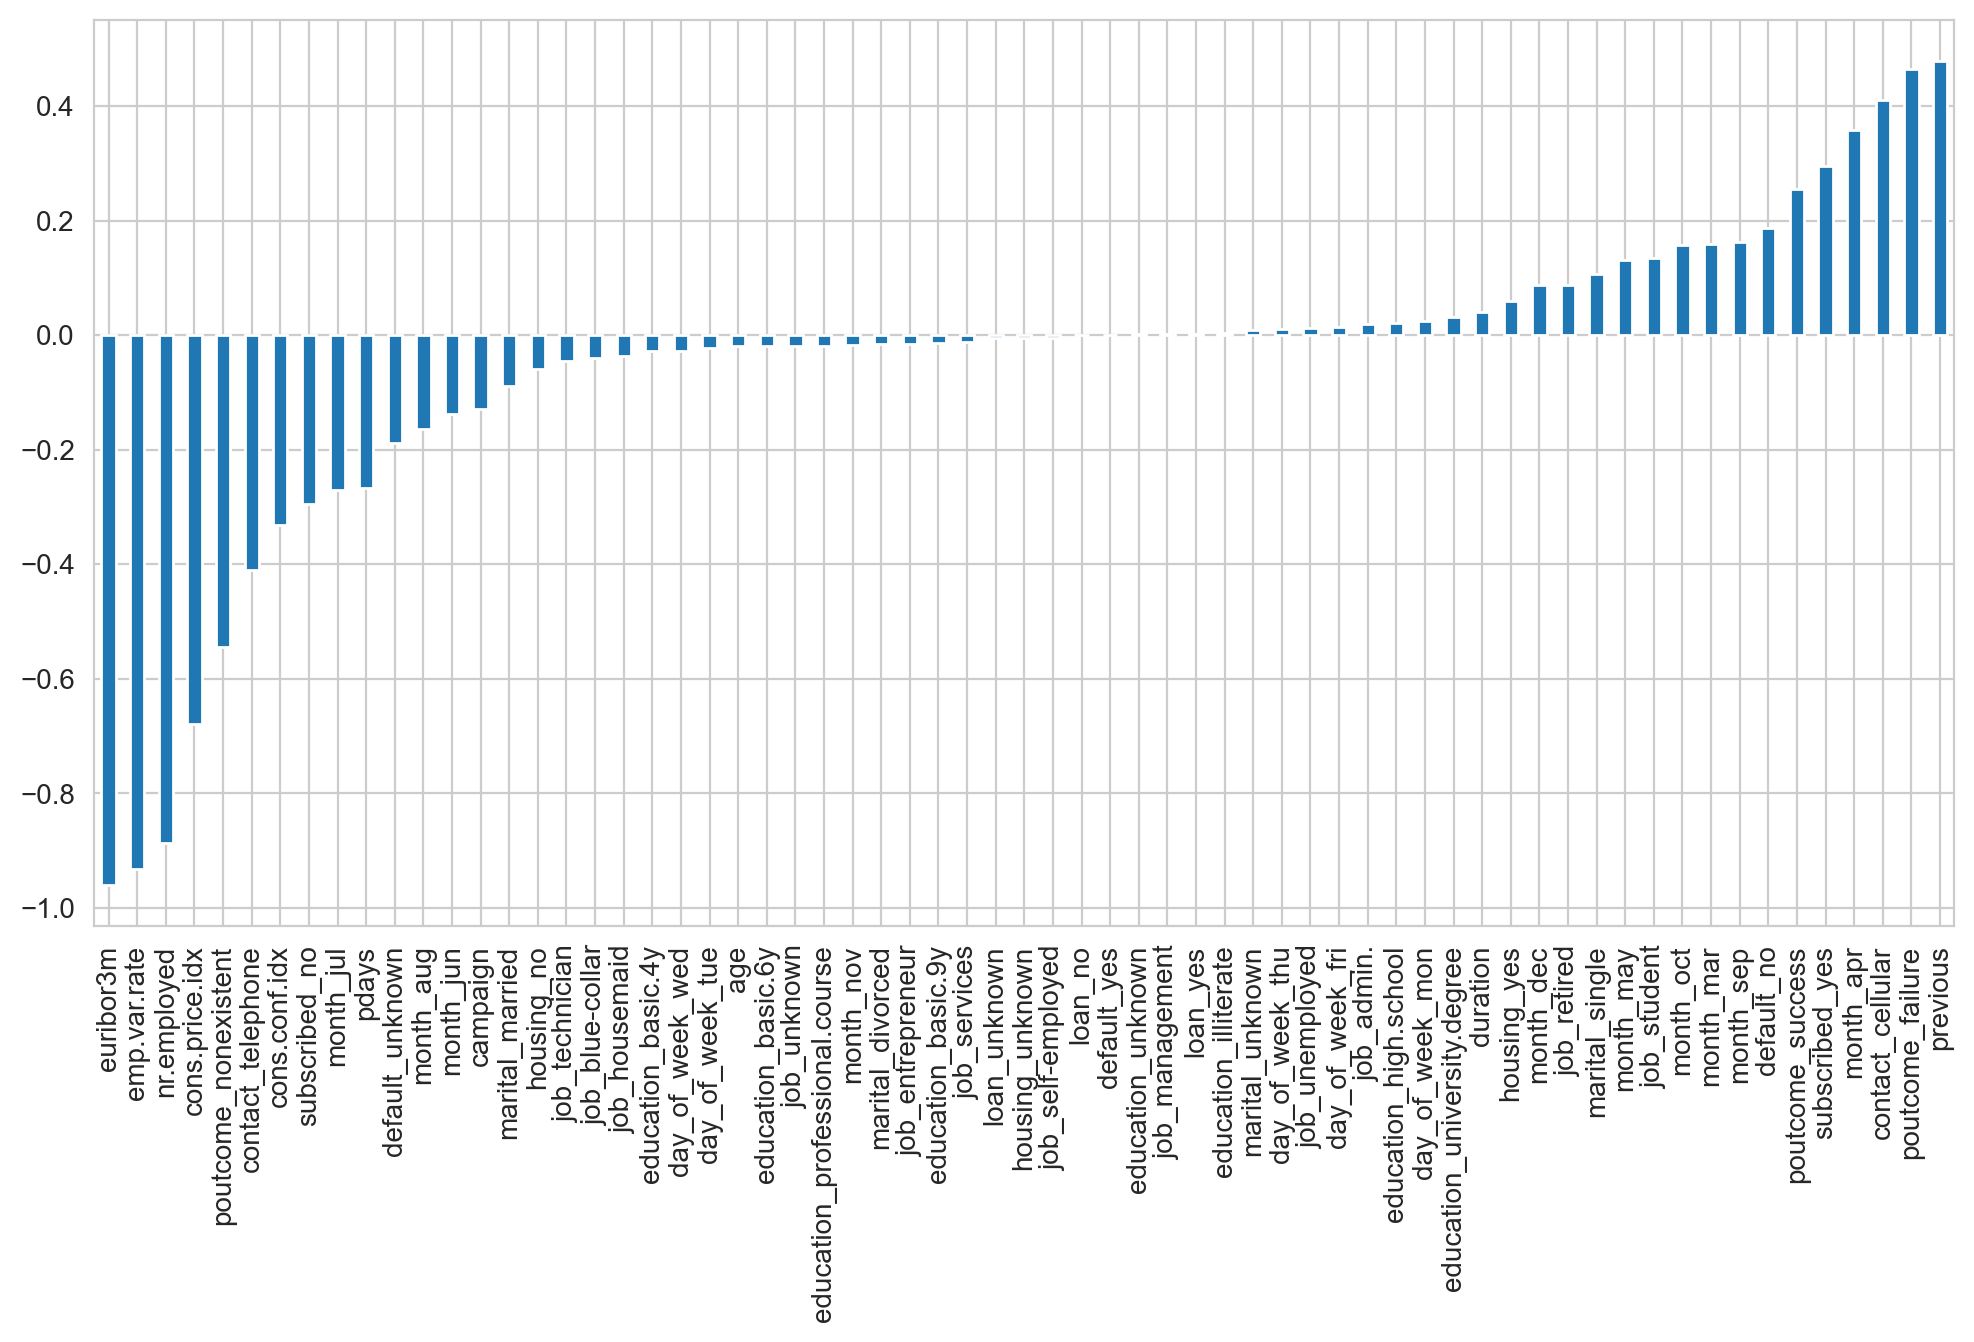

In [151]:
plt.figure(figsize=(12,6),dpi=200)
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')

In [152]:
#this shows what features are important to a particular cluster assignment then 
#you can talk to domain expert to know waht these clusters actually represents

In [153]:
#ssd sum of squared distances from points to cluster center
#we can look for a k value where the rate of reduction in SSD begins to decline

In [154]:
ssd = []

for k in range(2,10):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(scaled_X)
    
    #Sum of squared distances of samples to their closest cluster center is
    #denoted by model.inertia_.
    ssd.append(model.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

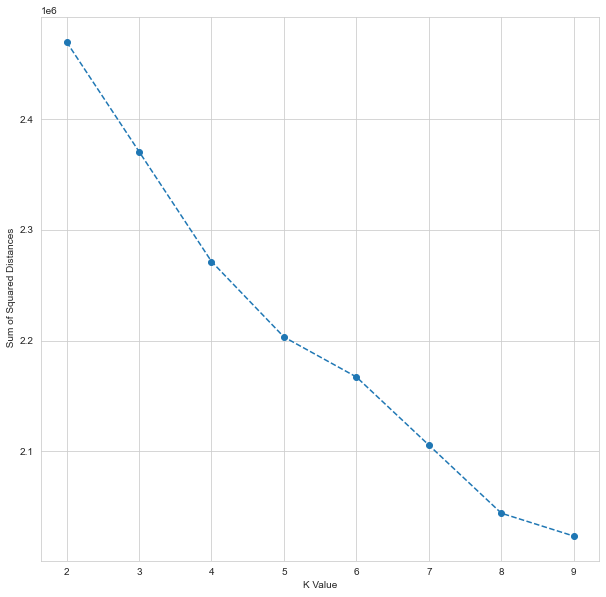

In [155]:
plt.plot(range(2,10),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

In [156]:
#At k=8 reduction in ssd is very less so it is good choice

In [157]:
ssd

[2469792.381034953,
 2370786.9033089946,
 2271502.700771752,
 2203314.5879398095,
 2167212.9661875437,
 2105687.7969447025,
 2044202.5740177317,
 2023556.1330033136]

In [158]:
# Change in SSD from previous K value!
pd.Series(ssd).diff()

0             NaN
1   -99005.477726
2   -99284.202537
3   -68188.112832
4   -36101.621752
5   -61525.169243
6   -61485.222927
7   -20646.441014
dtype: float64

<AxesSubplot:>

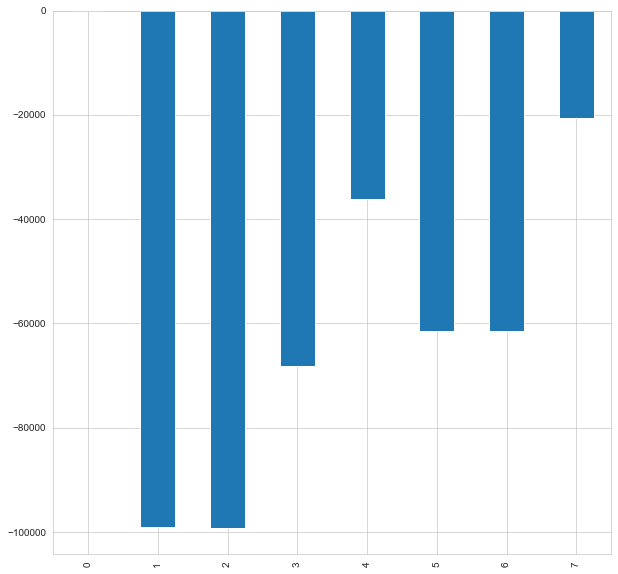

In [159]:
pd.Series(ssd).diff().plot(kind='bar')

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [160]:
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [162]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_X)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(scaled_X, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.11700113001983009
For n_clusters=3, the silhouette score is 0.04472719022413179
For n_clusters=4, the silhouette score is 0.05864897822354068
For n_clusters=5, the silhouette score is 0.06753398319550898
For n_clusters=6, the silhouette score is 0.06407484932456425
For n_clusters=7, the silhouette score is 0.06894279497455566
For n_clusters=8, the silhouette score is 0.07166779875912231


# Hierarchical Clustering


**Overview**<br>
<a href="https://archive.ics.uci.edu/ml/datasets/online+retail">Online retail is a transnational data set</a> which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

The steps are broadly:
1. Read and understand the data
2. Clean the data
3. Prepare the data for modelling
4. Modelling
5. Final analysis and reco

## 1. Read and visualise the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# read the dataset
retail_df = pd.read_csv("Online+Retail.csv", sep=",", encoding="ISO-8859-1", header=0)
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
# basics of the df
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
retail_df.shape

(541909, 8)

## 2. Clean the data

In [5]:
# missing values
round(100*(retail_df.isnull().sum())/len(retail_df), 2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [6]:
# drop all rows having missing values
retail_df = retail_df.dropna()
retail_df.shape

(406829, 8)

In [7]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [8]:
# new column: amount 
retail_df['amount'] = retail_df['Quantity']*retail_df['UnitPrice']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


# 3. Prepare the data for modelling

- R (Recency): Number of days since last purchase
- F (Frequency): Number of tracsactions
- M (Monetary): Total amount of transactions (revenue contributed)

In [9]:
# monetary
grouped_df = retail_df.groupby('CustomerID')['amount'].sum()
grouped_df = grouped_df.reset_index()
grouped_df.head()

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [10]:
# frequency
frequency = retail_df.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()
frequency.columns = ['CustomerID', 'frequency']
frequency.head()

,CustomerID,frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [11]:
# merge the two dfs
grouped_df = pd.merge(grouped_df, frequency, on='CustomerID', how='inner')
grouped_df.head()

,CustomerID,amount,frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [12]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [13]:
# recency
# convert to datetime
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'], 
                                          format='%d-%m-%Y %H:%M')

In [14]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [15]:
# compute the max date
max_date = max(retail_df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [16]:
# compute the diff
retail_df['diff'] = max_date - retail_df['InvoiceDate']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [17]:
last_purchase = retail_df.groupby('CustomerID')['diff'].min()
last_purchase = last_purchase.reset_index()
last_purchase.head()

,CustomerID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [18]:
# merge
grouped_df = pd.merge(grouped_df, last_purchase, on='CustomerID', how='inner')
grouped_df.columns = ['CustomerID', 'amount', 'frequency', 'recency']
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [19]:
# number of days only
grouped_df['recency'] = grouped_df['recency'].dt.days
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


{'whiskers': [<matplotlib.lines.Line2D at 0x1fc0dd55898>,
 'caps': [<matplotlib.lines.Line2D at 0x1fc0dd55e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fc0dd55550>],
 'medians': [<matplotlib.lines.Line2D at 0x1fc0dd6e400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fc0dd6e6d8>],
 'means': []}

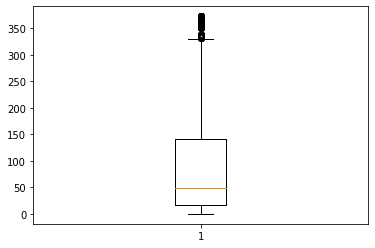

In [20]:
# 1. outlier treatment
plt.boxplot(grouped_df['recency'])

In [21]:
# two types of outliers:
# - statistical
# - domain specific

In [22]:
# removing (statistical) outliers
Q1 = grouped_df.amount.quantile(0.05)
Q3 = grouped_df.amount.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.amount >= Q1 - 1.5*IQR) & (grouped_df.amount <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = grouped_df.recency.quantile(0.05)
Q3 = grouped_df.recency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.recency >= Q1 - 1.5*IQR) & (grouped_df.recency <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = grouped_df.frequency.quantile(0.05)
Q3 = grouped_df.frequency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.frequency >= Q1 - 1.5*IQR) & (grouped_df.frequency <= Q3 + 1.5*IQR)]



In [23]:
# 2. rescaling
rfm_df = grouped_df[['amount', 'frequency', 'recency']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4293, 3)

In [24]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['amount', 'frequency', 'recency']
rfm_df_scaled.head()

,amount,frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


# 4. Modelling

In [25]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [26]:
kmeans.labels_

array([2, 0, 1, ..., 2, 1, 1])

## Finding the Optimal Number of Clusters

## SSD

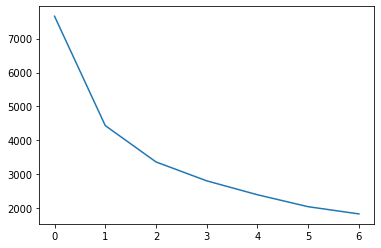

In [28]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [29]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.5415858652525395
For n_clusters=3, the silhouette score is 0.5084896296141937
For n_clusters=4, the silhouette score is 0.48193565010121303
For n_clusters=5, the silhouette score is 0.466103965297297
For n_clusters=6, the silhouette score is 0.4169854725264892
For n_clusters=7, the silhouette score is 0.41481670613813887
For n_clusters=8, the silhouette score is 0.3945888120015245


In [30]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [31]:
kmeans.labels_

array([2, 1, 0, ..., 2, 0, 0])

In [32]:
# assign the label
grouped_df['cluster_id'] = kmeans.labels_
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_id
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2


<AxesSubplot:xlabel='cluster_id', ylabel='amount'>

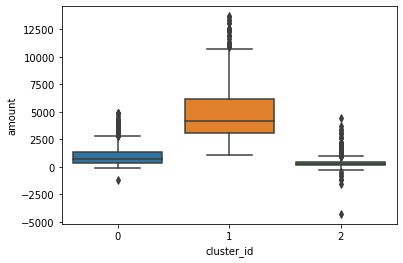

In [33]:
# plot
sns.boxplot(x='cluster_id', y='amount', data=grouped_df)

In [34]:
rfm_df_scaled.head()

,amount,frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [35]:
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_id
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2


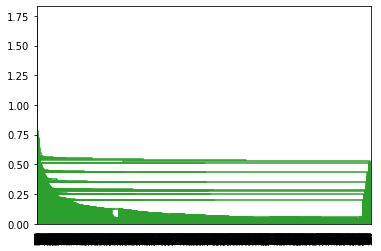

In [36]:
# single linkage
mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

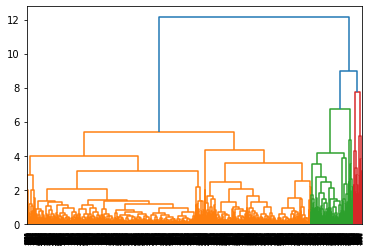

In [37]:
# complete linkage
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [38]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 0, ..., 0, 0, 0])

In [39]:
# assign cluster labels
grouped_df['cluster_labels'] = cluster_labels
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_id,cluster_labels
0,12346.0,0.00,2,325,2,0
1,12347.0,4310.00,182,1,1,1
2,12348.0,1797.24,31,74,0,0
3,12349.0,1757.55,73,18,0,0
4,12350.0,334.40,17,309,2,0


<AxesSubplot:xlabel='cluster_labels', ylabel='recency'>

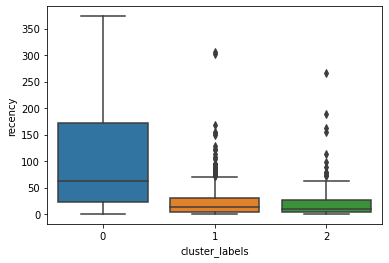

In [40]:
# plots
sns.boxplot(x='cluster_labels', y='recency', data=grouped_df)

<AxesSubplot:xlabel='cluster_labels', ylabel='frequency'>

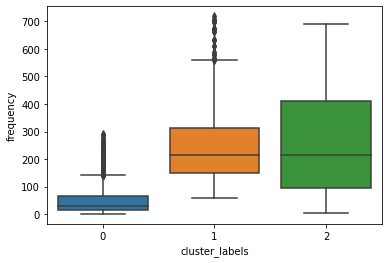

In [41]:
# plots
sns.boxplot(x='cluster_labels', y='frequency', data=grouped_df)

In [42]:
# cluster 0 is lowest average frequency customers that is they are not 
#contributing to the revenue they are not doing transactions frequently.but cluster
#1 and 2 are on higher side

<AxesSubplot:xlabel='cluster_labels', ylabel='amount'>

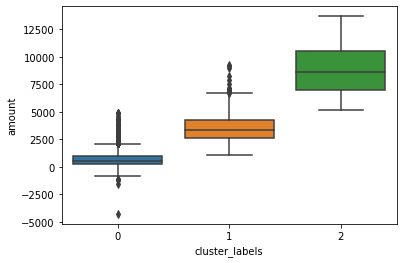

In [43]:
# plots
sns.boxplot(x='cluster_labels', y='amount', data=grouped_df)

### Based on total amt of transactions cluster no 2 represents high value customers cluster 0 represents low value customers and cluster 1 represents moderate ones